#**Evidencia 1. Análisis estadístico de la base de datos**

## **EQUIPO TEAM 4 FANTASTIC**

*   Abner Palma García - A01735312
*   Edwin Nepomuceno Rivera - A01174706
*   Luis Alberto Mirón Toruño - A01735489
*   Paula Gabriela Armenta Nazario - A01735618

## **Previo a la estadística descriptiva de las bases de datos**

### **Archivo: Detalle precios y productos fabricados 2022**

In [ ]:
#Importamos librerías requeridas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



> **Limpieza**



In [ ]:
#Carga desde un archivo .xlsx sin indice
dpf= pd.read_csv('Detalle precios y productos fabricados 2022.csv')
dpf.head(3)

,CVE_DOC,FECHA_DOC,NOMBRE,NOMBRE.1,CANT,CVE_ART,DESCR,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,F37034,05/01/2022 00:00,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,1,TUE00244,"TUB COBRE 5/16""ØX165MM CIRCULA1.5KW127V",$434.48,$52.80,$52.80,$434.48,$52.80,$381.68,$381.68
1,F37036,05/01/2022 00:00,LETICIA RAMIREZ HERNANDEZ,JUAN ANTONIO RESENDIZ UGALDE,1,TUA00028,"TUA U"" 5/16 ØX250MM 1200W 120V TAP1""NPT","$1,264.05",$327.18,$327.18,"$1,264.05",$327.18,$936.87,$936.87
2,F37041,05/01/2022 00:00,DIEGO ARMANDO LEON DURAN,ANA BARBARA CRUZ PALACIOS,7,TP0007,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 7 MT,$551.61,$177.68,$177.68,"$3,861.29","$1,243.73",$373.94,"$2,617.56"


In [ ]:
#Identificar valores nulos por columna
valores_nulos=dpf.isnull().sum()
valores_nulos

CVE_DOC                      0
FECHA_DOC                    0
NOMBRE                       2
NOMBRE.1                     0
CANT                         0
CVE_ART                      0
DESCR                        0
PRECIO_UNITARIO              0
COSTO_UNITARIO               0
COSTO_UNITARIO_CALCULADO     0
SUBTOTAL_PARTIDA             0
COSTO_TOTAL_CALCULADO        0
MARGEN_UNITARIO_CALCULADO    0
MARGEN_TOTAL_CALCULADO       0
dtype: int64

In [ ]:
#Sustituir valores nulos por valores no nulos hacia atrás "BACKWARD FILL" ("bfill")
#sustituimos los valos nulos de las columnas seleccionadas por el valor de la fila siguiente  no nulo que se encuentre en cada columna 
#Filtro por columnas
dpf["NOMBRE"]=dpf[["NOMBRE"]].fillna(method="bfill")

In [ ]:
#Identificar valores nulos por columna
valores_nulos=dpf.isnull().sum()
valores_nulos

CVE_DOC                      0
FECHA_DOC                    0
NOMBRE                       0
NOMBRE.1                     0
CANT                         0
CVE_ART                      0
DESCR                        0
PRECIO_UNITARIO              0
COSTO_UNITARIO               0
COSTO_UNITARIO_CALCULADO     0
SUBTOTAL_PARTIDA             0
COSTO_TOTAL_CALCULADO        0
MARGEN_UNITARIO_CALCULADO    0
MARGEN_TOTAL_CALCULADO       0
dtype: int64

In [ ]:
#Verificamos información del DataFrame
dpf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426 entries, 0 to 1425
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   CVE_DOC                    1426 non-null   object
 1   FECHA_DOC                  1426 non-null   object
 2   NOMBRE                     1426 non-null   object
 3   NOMBRE.1                   1426 non-null   object
 4   CANT                       1426 non-null   int64 
 5   CVE_ART                    1426 non-null   object
 6   DESCR                      1426 non-null   object
 7   PRECIO_UNITARIO            1426 non-null   object
 8   COSTO_UNITARIO             1426 non-null   object
 9   COSTO_UNITARIO_CALCULADO   1426 non-null   object
 10  SUBTOTAL_PARTIDA           1426 non-null   object
 11  COSTO_TOTAL_CALCULADO      1426 non-null   object
 12  MARGEN_UNITARIO_CALCULADO  1426 non-null   object
 13  MARGEN_TOTAL_CALCULADO     1426 non-null   object
dtypes: int64

In [ ]:
#dpf["PRECIO_UNITARIO"] = dpf["PRECIO_UNITARIO"].replace("$", "", regex=True)#.astype(float)
dpf[['PRECIO_UNITARIO', 'COSTO_UNITARIO']] = dpf[['PRECIO_UNITARIO', 'COSTO_UNITARIO']].replace({'\$': '', ',': ''}, regex=True).astype(float)
dpf[['COSTO_UNITARIO_CALCULADO', 'SUBTOTAL_PARTIDA']] = dpf[['COSTO_UNITARIO_CALCULADO', 'SUBTOTAL_PARTIDA']].replace({'\$': '', ',': ''}, regex=True).astype(float)
dpf[['COSTO_TOTAL_CALCULADO', 'MARGEN_UNITARIO_CALCULADO']] = dpf[['COSTO_TOTAL_CALCULADO', 'MARGEN_UNITARIO_CALCULADO']].replace({'\$': '', ',': ''}, regex=True).astype(float)
dpf['MARGEN_TOTAL_CALCULADO'] = dpf['MARGEN_TOTAL_CALCULADO'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [ ]:
dpf.head(2)

,CVE_DOC,FECHA_DOC,NOMBRE,NOMBRE.1,CANT,CVE_ART,DESCR,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,F37034,05/01/2022 00:00,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,1,TUE00244,"TUB COBRE 5/16""ØX165MM CIRCULA1.5KW127V",434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,F37036,05/01/2022 00:00,LETICIA RAMIREZ HERNANDEZ,JUAN ANTONIO RESENDIZ UGALDE,1,TUA00028,"TUA U"" 5/16 ØX250MM 1200W 120V TAP1""NPT",1264.05,327.18,327.18,1264.05,327.18,936.87,936.87


In [ ]:
#Verificamos información del DataFrame
dpf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426 entries, 0 to 1425
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CVE_DOC                    1426 non-null   object 
 1   FECHA_DOC                  1426 non-null   object 
 2   NOMBRE                     1426 non-null   object 
 3   NOMBRE.1                   1426 non-null   object 
 4   CANT                       1426 non-null   int64  
 5   CVE_ART                    1426 non-null   object 
 6   DESCR                      1426 non-null   object 
 7   PRECIO_UNITARIO            1426 non-null   float64
 8   COSTO_UNITARIO             1426 non-null   float64
 9   COSTO_UNITARIO_CALCULADO   1426 non-null   float64
 10  SUBTOTAL_PARTIDA           1426 non-null   float64
 11  COSTO_TOTAL_CALCULADO      1426 non-null   float64
 12  MARGEN_UNITARIO_CALCULADO  1426 non-null   float64
 13  MARGEN_TOTAL_CALCULADO     1426 non-null   float

In [ ]:
#Identificar valores nulos por columna
valores_nulos=dpf.isnull().sum()
valores_nulos

CVE_DOC                      0
FECHA_DOC                    0
NOMBRE                       0
NOMBRE.1                     0
CANT                         0
CVE_ART                      0
DESCR                        0
PRECIO_UNITARIO              0
COSTO_UNITARIO               0
COSTO_UNITARIO_CALCULADO     0
SUBTOTAL_PARTIDA             0
COSTO_TOTAL_CALCULADO        0
MARGEN_UNITARIO_CALCULADO    0
MARGEN_TOTAL_CALCULADO       0
dtype: int64



> **Valores Atípicos**



In [ ]:
#separamos las columnas numericas de las no numericas
df_str = dpf.select_dtypes(include=['object']).copy()
df_num = dpf.select_dtypes(include=['int64', 'float64']).copy()
print(df_num.info())
print(df_str.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426 entries, 0 to 1425
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CANT                       1426 non-null   int64  
 1   PRECIO_UNITARIO            1426 non-null   float64
 2   COSTO_UNITARIO             1426 non-null   float64
 3   COSTO_UNITARIO_CALCULADO   1426 non-null   float64
 4   SUBTOTAL_PARTIDA           1426 non-null   float64
 5   COSTO_TOTAL_CALCULADO      1426 non-null   float64
 6   MARGEN_UNITARIO_CALCULADO  1426 non-null   float64
 7   MARGEN_TOTAL_CALCULADO     1426 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 89.2 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426 entries, 0 to 1425
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CVE_DOC    1426 non-null   object
 1   FECHA_DOC  1426 non-null   object
 2   NOMBRE     

<Figure size 1500x800 with 0 Axes>

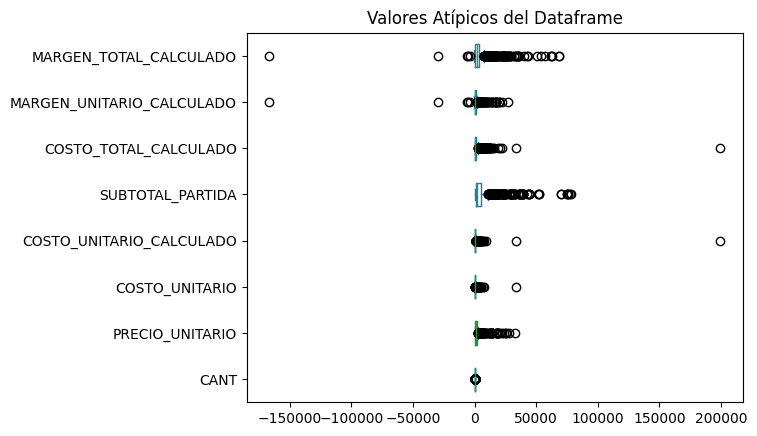

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
df_num.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama



> **PROCEDIMIENTO "CUANTILES" PARA SUSTITUIR OUTLIERS EN DATAFRAME**



In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=df_num

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido CANT                             8.50000
PRECIO_UNITARIO               2954.86625
COSTO_UNITARIO                 567.95000
COSTO_UNITARIO_CALCULADO       807.81375
SUBTOTAL_PARTIDA             10783.51250
COSTO_TOTAL_CALCULADO         2971.36250
MARGEN_UNITARIO_CALCULADO     2089.94625
MARGEN_TOTAL_CALCULADO        7807.59750
dtype: float64
Limite inferior permitido CANT                           -3.50000
PRECIO_UNITARIO              -927.40375
COSTO_UNITARIO               -340.77000
COSTO_UNITARIO_CALCULADO     -340.87625
SUBTOTAL_PARTIDA            -4946.78750
COSTO_TOTAL_CALCULADO       -1506.25750
MARGEN_UNITARIO_CALCULADO    -621.22375
MARGEN_TOTAL_CALCULADO      -3594.42250
dtype: float64


In [ ]:
#Encontramos Outliers del Dataframe
outliers_iqr= df_num[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1424,NaN,5909.84,1884.35,1884.35,NaN,NaN,4025.49,NaN


In [ ]:
#Obtenemos datos limpios del Dataframe
data3_iqr= df_num[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,1.0,434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,1.0,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,7.0,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56
3,1.0,140.00,38.96,38.96,140.00,38.96,101.04,101.04
4,2.0,172.41,101.71,101.71,344.83,203.42,70.71,141.41
...,...,...,...,...,...,...,...,...
1421,6.0,712.00,102.31,102.31,4272.00,613.88,609.69,3658.12
1422,6.0,718.60,104.69,104.69,4311.60,628.12,613.91,3683.48
1423,3.0,2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41
1424,1.0,NaN,NaN,NaN,5909.84,1884.35,NaN,4025.49


In [ ]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

CANT                         169
PRECIO_UNITARIO              127
COSTO_UNITARIO               128
COSTO_UNITARIO_CALCULADO     144
SUBTOTAL_PARTIDA             159
COSTO_TOTAL_CALCULADO        162
MARGEN_UNITARIO_CALCULADO    132
MARGEN_TOTAL_CALCULADO       168
dtype: int64

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data5_iqr=data3_iqr.copy()
data5_iqr=data5_iqr.fillna(round(data3_iqr.mean(),1))
data5_iqr

,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,1.0,434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,1.0,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,7.0,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56
3,1.0,140.00,38.96,38.96,140.00,38.96,101.04,101.04
4,2.0,172.41,101.71,101.71,344.83,203.42,70.71,141.41
...,...,...,...,...,...,...,...,...
1421,6.0,712.00,102.31,102.31,4272.00,613.88,609.69,3658.12
1422,6.0,718.60,104.69,104.69,4311.60,628.12,613.91,3683.48
1423,3.0,2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41
1424,1.0,942.70,108.00,219.90,5909.84,1884.35,684.80,4025.49


In [ ]:
df_limpio = pd.concat([df_str, data5_iqr], axis=1)
df_limpio.head(3)

,CVE_DOC,FECHA_DOC,NOMBRE,NOMBRE.1,CVE_ART,DESCR,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,F37034,05/01/2022 00:00,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,TUE00244,"TUB COBRE 5/16""ØX165MM CIRCULA1.5KW127V",1.0,434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,F37036,05/01/2022 00:00,LETICIA RAMIREZ HERNANDEZ,JUAN ANTONIO RESENDIZ UGALDE,TUA00028,"TUA U"" 5/16 ØX250MM 1200W 120V TAP1""NPT",1.0,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,F37041,05/01/2022 00:00,DIEGO ARMANDO LEON DURAN,ANA BARBARA CRUZ PALACIOS,TP0007,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 7 MT,7.0,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56


In [ ]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=df_limpio.isnull().sum()
valores_nulos

CVE_DOC                      0
FECHA_DOC                    0
NOMBRE                       0
NOMBRE.1                     0
CVE_ART                      0
DESCR                        0
CANT                         0
PRECIO_UNITARIO              0
COSTO_UNITARIO               0
COSTO_UNITARIO_CALCULADO     0
SUBTOTAL_PARTIDA             0
COSTO_TOTAL_CALCULADO        0
MARGEN_UNITARIO_CALCULADO    0
MARGEN_TOTAL_CALCULADO       0
dtype: int64

### **Archivo: Gastos y Costos 2022**



> **Limpieza**



In [ ]:
#Carga desde un archivo .xlsx sin indice
df= pd.read_csv('Gastos_costos_2022.csv')
df.head(3)

,Unnamed: 0,FECHA,FOLIO,PROVEEDOR,DESCRIPCION,TIPO_GASTO,IMPORTE,IVA,TOTAL MX
0,4,2022-01-01,280109,BEPENSA LEASING S.A. DE C.V.,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,ARRENDAMIENTO FINANCIERO,5551.98,888.32,6440.3
1,5,2022-01-01,007817297284,"BANCO NACIONAL DE MEXICO, S.A.",Servicios de Facturación,COMISION BANCARIA,0.00,0.00,0.0
2,6,2022-01-01,5595,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,Pago,COMPRAS,0.00,0.00,0.0


In [ ]:
#Identificar valores nulos por columna
valores_nulos=df.isnull().sum()
valores_nulos

Unnamed: 0     0
FECHA          0
FOLIO          0
PROVEEDOR      0
DESCRIPCION    0
TIPO_GASTO     0
IMPORTE        0
IVA            0
TOTAL MX       0
dtype: int64

In [ ]:
#Verificamos información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2576 entries, 0 to 2575
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   2576 non-null   int64  
 1   FECHA        2576 non-null   object 
 2   FOLIO        2576 non-null   object 
 3   PROVEEDOR    2576 non-null   object 
 4   DESCRIPCION  2576 non-null   object 
 5   TIPO_GASTO   2576 non-null   object 
 6   IMPORTE      2576 non-null   float64
 7   IVA          2576 non-null   float64
 8   TOTAL MX     2576 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 181.2+ KB




> **Valores Atípicos**



In [ ]:
#borramos la columna Unnamed: 0 
df=df.drop("Unnamed: 0", axis=1)
df.head(2)

,FECHA,FOLIO,PROVEEDOR,DESCRIPCION,TIPO_GASTO,IMPORTE,IVA,TOTAL MX
0,2022-01-01,280109,BEPENSA LEASING S.A. DE C.V.,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,ARRENDAMIENTO FINANCIERO,5551.98,888.32,6440.3
1,2022-01-01,007817297284,"BANCO NACIONAL DE MEXICO, S.A.",Servicios de Facturación,COMISION BANCARIA,0.00,0.00,0.0


In [ ]:
#separamos las columnas numericas de las no numericas
df_obj = df.select_dtypes(include=['object']).copy()
df_num = df.select_dtypes(include=['int64', 'float64']).copy()
print("DF_NUM")
print(df_num.info())
print("DF_OBJ")
print(df_obj.info())

DF_NUM
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2576 entries, 0 to 2575
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   IMPORTE   2576 non-null   float64
 1   IVA       2576 non-null   float64
 2   TOTAL MX  2576 non-null   float64
dtypes: float64(3)
memory usage: 60.5 KB
None
DF_OBJ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2576 entries, 0 to 2575
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FECHA        2576 non-null   object
 1   FOLIO        2576 non-null   object
 2   PROVEEDOR    2576 non-null   object
 3   DESCRIPCION  2576 non-null   object
 4   TIPO_GASTO   2576 non-null   object
dtypes: object(5)
memory usage: 100.8+ KB
None


<Figure size 1500x800 with 0 Axes>

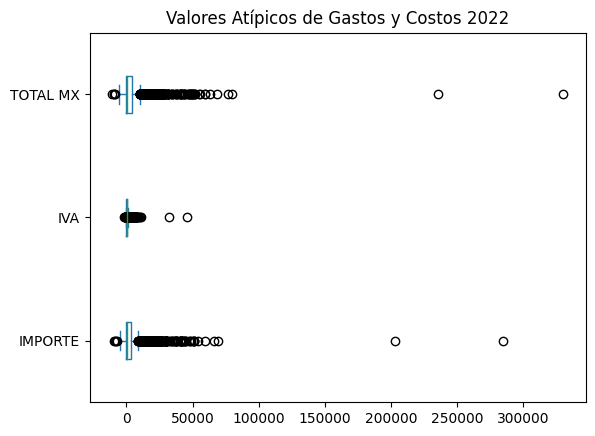

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
df_num.plot(kind='box', vert=False)
plt.title("Valores Atípicos de Gastos y Costos 2022")
plt.show() #dibujamos el diagrama



> **PROCEDIMIENTO "CUANTILES" PARA SUSTITUIR OUTLIERS EN DATAFRAME**



In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=df_num

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido IMPORTE      9014.725
IVA          1031.150
TOTAL MX    10299.925
dtype: float64
Limite inferior permitido IMPORTE    -5408.835
IVA         -618.690
TOTAL MX   -6179.955
dtype: float64


In [ ]:
#Encontramos Outliers del Dataframe
outliers_iqr= df_num[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,IMPORTE,IVA,TOTAL MX
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
2571,NaN,NaN,NaN
2572,17310.3,NaN,17826.62
2573,NaN,NaN,NaN
2574,NaN,NaN,NaN


In [ ]:
#Obtenemos datos limpios del Dataframe
data_iqr= df_num[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_iqr

,IMPORTE,IVA,TOTAL MX
0,5551.98,888.32,6440.3
1,0.00,0.00,0.0
2,0.00,0.00,0.0
3,0.00,0.00,0.0
4,0.00,0.00,0.0
...,...,...,...
2571,0.00,0.00,0.0
2572,NaN,516.32,NaN
2573,0.00,0.00,0.0
2574,0.00,0.00,0.0


In [ ]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_iqr.isnull().sum()
valores_nulos

IMPORTE     307
IVA         303
TOTAL MX    304
dtype: int64

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data2_iqr=data_iqr.copy()
data2_iqr=data2_iqr.fillna(round(data_iqr.mean(),1))
data2_iqr

,IMPORTE,IVA,TOTAL MX
0,5551.98,888.32,6440.3
1,0.00,0.00,0.0
2,0.00,0.00,0.0
3,0.00,0.00,0.0
4,0.00,0.00,0.0
...,...,...,...
2571,0.00,0.00,0.0
2572,1440.70,516.32,1660.0
2573,0.00,0.00,0.0
2574,0.00,0.00,0.0


In [ ]:
df_limpio2 = pd.concat([df_obj, data2_iqr], axis=1)
df_limpio2.head(3)

,FECHA,FOLIO,PROVEEDOR,DESCRIPCION,TIPO_GASTO,IMPORTE,IVA,TOTAL MX
0,2022-01-01,280109,BEPENSA LEASING S.A. DE C.V.,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,ARRENDAMIENTO FINANCIERO,5551.98,888.32,6440.3
1,2022-01-01,007817297284,"BANCO NACIONAL DE MEXICO, S.A.",Servicios de Facturación,COMISION BANCARIA,0.00,0.00,0.0
2,2022-01-01,5595,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,Pago,COMPRAS,0.00,0.00,0.0


In [ ]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=df_limpio2.isnull().sum()
valores_nulos

FECHA          0
FOLIO          0
PROVEEDOR      0
DESCRIPCION    0
TIPO_GASTO     0
IMPORTE        0
IVA            0
TOTAL MX       0
dtype: int64

### **Archivo: GASTOS Y COSTOS 2023**



> **Limpieza**



In [ ]:
#Carga desde un archivo .xlsx sin indice
df2= pd.read_csv('Gastos_costos_2023.csv')
df2.head(3)

,Unnamed: 0,Fecha,Folio,Proveedor,Descripción,TIPO GASTO,Importe,IVA,TOTAL MX
0,0,2023-01-01,31,AESA ARTICULOS ELECTRICOS,Pago,COMPRAS,0.00,0.00,0.0
1,1,2023-01-01,38,AESA ARTICULOS ELECTRICOS,Pago,COMPRAS,0.00,0.00,0.0
2,2,2023-01-01,341932,BEPENSA LEASING S.A. DE C.V.,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,ARRENDAMIENTO FINANCIERO,5551.38,888.22,6439.6


In [ ]:
#Identificar valores nulos por columna
valores_nulos=df2.isnull().sum()
valores_nulos

Unnamed: 0     0
Fecha          0
Folio          0
Proveedor      0
Descripción    0
TIPO GASTO     0
Importe        0
IVA            0
TOTAL MX       0
dtype: int64

In [ ]:
#Verificamos información del DataFrame
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   397 non-null    int64  
 1   Fecha        397 non-null    object 
 2   Folio        397 non-null    object 
 3   Proveedor    397 non-null    object 
 4   Descripción  397 non-null    object 
 5   TIPO GASTO   397 non-null    object 
 6   Importe      397 non-null    float64
 7   IVA          397 non-null    float64
 8   TOTAL MX     397 non-null    float64
dtypes: float64(3), int64(1), object(5)
memory usage: 28.0+ KB




> **Valores Atípicos**



In [ ]:
#borramos la columna Unnamed: 0 
df3=df2.drop("Unnamed: 0", axis=1)
df3.head(2)

,Fecha,Folio,Proveedor,Descripción,TIPO GASTO,Importe,IVA,TOTAL MX
0,2023-01-01,31,AESA ARTICULOS ELECTRICOS,Pago,COMPRAS,0.0,0.0,0.0
1,2023-01-01,38,AESA ARTICULOS ELECTRICOS,Pago,COMPRAS,0.0,0.0,0.0


In [ ]:
#separamos las columnas numericas de las no numericas
df_obj2 = df3.select_dtypes(include=['object']).copy()
df_num2 = df3.select_dtypes(include=['int64', 'float64']).copy()
print("DF_NUM")
print(df_num2.info())
print("DF_OBJ")
print(df_obj2.info())

DF_NUM
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Importe   397 non-null    float64
 1   IVA       397 non-null    float64
 2   TOTAL MX  397 non-null    float64
dtypes: float64(3)
memory usage: 9.4 KB
None
DF_OBJ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Fecha        397 non-null    object
 1   Folio        397 non-null    object
 2   Proveedor    397 non-null    object
 3   Descripción  397 non-null    object
 4   TIPO GASTO   397 non-null    object
dtypes: object(5)
memory usage: 15.6+ KB
None


<Figure size 1500x800 with 0 Axes>

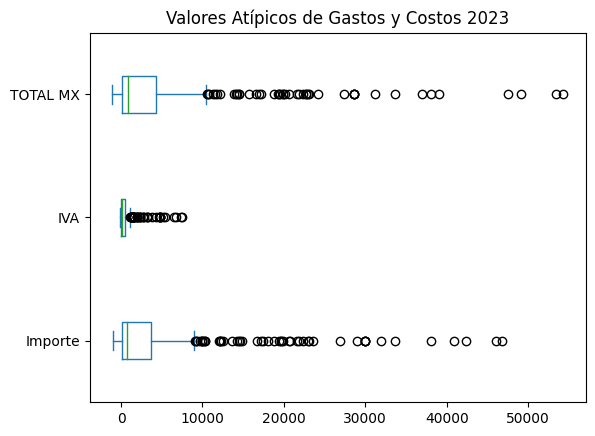

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
df_num2.plot(kind='box', vert=False)
plt.title("Valores Atípicos de Gastos y Costos 2023")
plt.show() #dibujamos el diagrama



> **PROCEDIMIENTO "CUANTILES" PARA SUSTITUIR OUTLIERS EN DATAFRAME**



In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=df_num2

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido Importe      9075.43
IVA          1120.00
TOTAL MX    10527.50
dtype: float64
Limite inferior permitido Importe    -5259.05
IVA         -672.00
TOTAL MX   -6100.50
dtype: float64


In [ ]:
#Encontramos Outliers del Dataframe
outliers_iqr2= df_num2[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr2

,Importe,IVA,TOTAL MX
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,1352.7,NaN
...,...,...,...
392,NaN,NaN,NaN
393,NaN,NaN,NaN
394,18071.52,NaN,18753.92
395,14472.32,NaN,14472.32


In [ ]:
#Obtenemos datos limpios del Dataframe
data4_iqr= df_num2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data4_iqr

,Importe,IVA,TOTAL MX
0,0.00,0.00,0.00
1,0.00,0.00,0.00
2,5551.38,888.22,6439.60
3,5551.98,888.32,6440.30
4,8454.37,NaN,9807.07
...,...,...,...
392,0.00,0.00,0.00
393,220.00,0.00,220.00
394,NaN,682.40,NaN
395,NaN,0.00,NaN


In [ ]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data4_iqr.isnull().sum()
valores_nulos

Importe     50
IVA         49
TOTAL MX    46
dtype: int64

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data6_iqr=data4_iqr.copy()
data6_iqr=data4_iqr.fillna(round(data4_iqr.mean(),1))
data6_iqr

,Importe,IVA,TOTAL MX
0,0.00,0.00,0.00
1,0.00,0.00,0.00
2,5551.38,888.22,6439.60
3,5551.98,888.32,6440.30
4,8454.37,176.80,9807.07
...,...,...,...
392,0.00,0.00,0.00
393,220.00,0.00,220.00
394,1521.50,682.40,1845.00
395,1521.50,0.00,1845.00


In [ ]:
df_limpio3 = pd.concat([df_obj2, data6_iqr], axis=1)
df_limpio3.head(3)

,Fecha,Folio,Proveedor,Descripción,TIPO GASTO,Importe,IVA,TOTAL MX
0,2023-01-01,31,AESA ARTICULOS ELECTRICOS,Pago,COMPRAS,0.00,0.00,0.0
1,2023-01-01,38,AESA ARTICULOS ELECTRICOS,Pago,COMPRAS,0.00,0.00,0.0
2,2023-01-01,341932,BEPENSA LEASING S.A. DE C.V.,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,ARRENDAMIENTO FINANCIERO,5551.38,888.22,6439.6


In [ ]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=df_limpio3.isnull().sum()
valores_nulos

Fecha          0
Folio          0
Proveedor      0
Descripción    0
TIPO GASTO     0
Importe        0
IVA            0
TOTAL MX       0
dtype: int64

### **Archivo: DATOS DE FACTURACIÓN**



> Limpieza



In [ ]:
#Carga desde un archivo .xlsx sin indice
df_facturas= pd.read_csv('Datos_Facturacion _sin_nulos.csv')
df_facturas.head(3)

,Unnamed: 0,CVE_DOC,CVE_CLPV,STATUS,CVE_VEND,FECHAELAB,FECHA_DOC,FECHA_ENT,FECHA_VEN,FECHA_CANCELA,CAN_TOT,DES_TOT,DES_FIN
0,0,F29414,2465.0,C,1.0,2019-09-03 08:58:42.000,2019-09-03,2019-09-03 00:00:00,2019-09-18,2019-09-04 00:00:00,3980.0,0.0,0
1,1,F29415,3926.0,C,1.0,2019-09-03 09:55:14.000,2019-09-03,2019-09-03 00:00:00,2019-10-03,2019-09-03 00:00:00,1550.0,0.0,0
2,2,F29416,3926.0,C,1.0,2019-09-03 13:25:33.000,2019-09-03,2019-09-03 00:00:00,2019-10-03,2019-09-03 00:00:00,1550.0,0.0,0


In [ ]:
#Identificar valores nulos por columna
valores_nulos=df_facturas.isnull().sum()
valores_nulos

Unnamed: 0       0
CVE_DOC          0
CVE_CLPV         0
STATUS           0
CVE_VEND         0
FECHAELAB        0
FECHA_DOC        0
FECHA_ENT        0
FECHA_VEN        0
FECHA_CANCELA    0
CAN_TOT          0
DES_TOT          0
DES_FIN          0
dtype: int64

In [ ]:
#Verificamos información del DataFrame
df_facturas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10895 entries, 0 to 10894
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     10895 non-null  int64  
 1   CVE_DOC        10895 non-null  object 
 2   CVE_CLPV       10895 non-null  float64
 3   STATUS         10895 non-null  object 
 4   CVE_VEND       10895 non-null  float64
 5   FECHAELAB      10895 non-null  object 
 6   FECHA_DOC      10895 non-null  object 
 7   FECHA_ENT      10895 non-null  object 
 8   FECHA_VEN      10895 non-null  object 
 9   FECHA_CANCELA  10895 non-null  object 
 10  CAN_TOT        10895 non-null  float64
 11  DES_TOT        10895 non-null  float64
 12  DES_FIN        10895 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 1.1+ MB


> **Valores Atípicos**

In [ ]:
#borramos la columna Unnamed: 0 
df_facturas=df_facturas.drop("Unnamed: 0", axis=1)
df_facturas

,CVE_DOC,CVE_CLPV,STATUS,CVE_VEND,FECHAELAB,FECHA_DOC,FECHA_ENT,FECHA_VEN,FECHA_CANCELA,CAN_TOT,DES_TOT,DES_FIN
0,F29414,2465.0,C,1.0,2019-09-03 08:58:42.000,2019-09-03,2019-09-03 00:00:00,2019-09-18,2019-09-04 00:00:00,3980.00,0.0,0
1,F29415,3926.0,C,1.0,2019-09-03 09:55:14.000,2019-09-03,2019-09-03 00:00:00,2019-10-03,2019-09-03 00:00:00,1550.00,0.0,0
2,F29416,3926.0,C,1.0,2019-09-03 13:25:33.000,2019-09-03,2019-09-03 00:00:00,2019-10-03,2019-09-03 00:00:00,1550.00,0.0,0
3,F29417,3926.0,C,1.0,2019-09-03 13:33:23.000,2019-09-03,2019-09-03 00:00:00,2019-10-03,2019-09-17 00:00:00,1550.00,0.0,0
4,F29418,6813.0,C,2.0,2019-09-03 14:23:45.000,2019-09-03,2019-09-03 00:00:00,2019-09-03,2019-09-10 00:00:00,2435.44,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10890,F40306,8842.0,E,2.0,2023-03-06 16:09:39.013,2023-03-06,2023-03-01 00:00:00,2023-03-06,0,3272.00,0.0,0
10891,F40307,6218.0,E,2.0,2023-03-06 16:38:42.933,2023-03-06,2023-03-06 00:00:00,2023-03-06,0,504.15,0.0,0
10892,F40308,5926.0,E,2.0,2023-03-06 17:02:33.390,2023-03-06,2023-03-06 00:00:00,2023-03-06,0,275.68,0.0,0
10893,F40309,361.0,E,2.0,2023-03-07 12:43:49.567,2023-03-07,2023-03-07 00:00:00,2023-03-07,0,129.30,0.0,0


In [ ]:
#separamos las columnas numericas de las no numericas
df_obj_fact = df_facturas.select_dtypes(include=['object']).copy()
df_num_fact = df_facturas.select_dtypes(include=['int64', 'float64']).copy()
print("DF_NUM")
print(df_num_fact.info())
print("DF_OBJ")
print(df_obj_fact.info())

DF_NUM
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10895 entries, 0 to 10894
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CVE_CLPV  10895 non-null  float64
 1   CVE_VEND  10895 non-null  float64
 2   CAN_TOT   10895 non-null  float64
 3   DES_TOT   10895 non-null  float64
 4   DES_FIN   10895 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 425.7 KB
None
DF_OBJ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10895 entries, 0 to 10894
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CVE_DOC        10895 non-null  object
 1   STATUS         10895 non-null  object
 2   FECHAELAB      10895 non-null  object
 3   FECHA_DOC      10895 non-null  object
 4   FECHA_ENT      10895 non-null  object
 5   FECHA_VEN      10895 non-null  object
 6   FECHA_CANCELA  10895 non-null  object
dtypes: object(7)
memory usage: 595.9+ KB
None


<Figure size 1500x800 with 0 Axes>

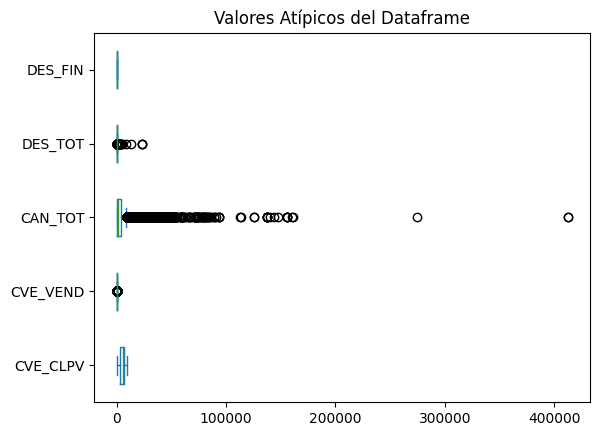

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
df_num_fact.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

> **PROCEDIMIENTO "CUANTILES" PARA SUSTITUIR OUTLIERS EN DATAFRAME**

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=df_num_fact

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqrf= percentile75 + 1.5*iqr
Limite_Inferior_iqrf= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqrf)
print("Limite inferior permitido", Limite_Inferior_iqrf)

Limite superior permitido CVE_CLPV    11816.000
CVE_VEND        2.000
CAN_TOT      9008.471
DES_TOT         0.000
DES_FIN         0.000
dtype: float64
Limite inferior permitido CVE_CLPV   -1456.000
CVE_VEND       2.000
CAN_TOT    -4483.705
DES_TOT        0.000
DES_FIN        0.000
dtype: float64


In [ ]:
#Encontramos Outliers del Dataframe
outliers_iqrf= df_num_fact[(y>Limite_Superior_iqrf)|(y<Limite_Inferior_iqrf)]
outliers_iqrf

,CVE_CLPV,CVE_VEND,CAN_TOT,DES_TOT,DES_FIN
0,NaN,1.0,NaN,NaN,NaN
1,NaN,1.0,NaN,NaN,NaN
2,NaN,1.0,NaN,NaN,NaN
3,NaN,1.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
10890,NaN,NaN,NaN,NaN,NaN
10891,NaN,NaN,NaN,NaN,NaN
10892,NaN,NaN,NaN,NaN,NaN
10893,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Obtenemos datos limpios del Dataframe
datafact_iqr= df_num_fact[(y<=Limite_Superior_iqrf)&(y>=Limite_Inferior_iqrf)]
datafact_iqr

,CVE_CLPV,CVE_VEND,CAN_TOT,DES_TOT,DES_FIN
0,2465.0,NaN,3980.00,0.0,0
1,3926.0,NaN,1550.00,0.0,0
2,3926.0,NaN,1550.00,0.0,0
3,3926.0,NaN,1550.00,0.0,0
4,6813.0,2.0,2435.44,0.0,0
...,...,...,...,...,...
10890,8842.0,2.0,3272.00,0.0,0
10891,6218.0,2.0,504.15,0.0,0
10892,5926.0,2.0,275.68,0.0,0
10893,361.0,2.0,129.30,0.0,0


In [ ]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=datafact_iqr.isnull().sum()
valores_nulos

CVE_CLPV       0
CVE_VEND    3189
CAN_TOT     1197
DES_TOT      153
DES_FIN        0
dtype: int64

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
datafact2_iqr=datafact_iqr.copy()
datafact2_iqr=datafact_iqr.fillna(round(datafact_iqr.mean(),1))
datafact2_iqr

,CVE_CLPV,CVE_VEND,CAN_TOT,DES_TOT,DES_FIN
0,2465.0,2.0,3980.00,0.0,0
1,3926.0,2.0,1550.00,0.0,0
2,3926.0,2.0,1550.00,0.0,0
3,3926.0,2.0,1550.00,0.0,0
4,6813.0,2.0,2435.44,0.0,0
...,...,...,...,...,...
10890,8842.0,2.0,3272.00,0.0,0
10891,6218.0,2.0,504.15,0.0,0
10892,5926.0,2.0,275.68,0.0,0
10893,361.0,2.0,129.30,0.0,0


In [ ]:
df_limpiofact = pd.concat([df_obj_fact, datafact2_iqr], axis=1)
df_limpiofact.head(3)

,CVE_DOC,STATUS,FECHAELAB,FECHA_DOC,FECHA_ENT,FECHA_VEN,FECHA_CANCELA,CVE_CLPV,CVE_VEND,CAN_TOT,DES_TOT,DES_FIN
0,F29414,C,2019-09-03 08:58:42.000,2019-09-03,2019-09-03 00:00:00,2019-09-18,2019-09-04 00:00:00,2465.0,2.0,3980.0,0.0,0
1,F29415,C,2019-09-03 09:55:14.000,2019-09-03,2019-09-03 00:00:00,2019-10-03,2019-09-03 00:00:00,3926.0,2.0,1550.0,0.0,0
2,F29416,C,2019-09-03 13:25:33.000,2019-09-03,2019-09-03 00:00:00,2019-10-03,2019-09-03 00:00:00,3926.0,2.0,1550.0,0.0,0


In [ ]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=df_limpiofact.isnull().sum()
valores_nulos

CVE_DOC          0
STATUS           0
FECHAELAB        0
FECHA_DOC        0
FECHA_ENT        0
FECHA_VEN        0
FECHA_CANCELA    0
CVE_CLPV         0
CVE_VEND         0
CAN_TOT          0
DES_TOT          0
DES_FIN          0
dtype: int64

In [ ]:
#Convertir DataFrame a CSV
df_limpiofact.to_csv("Datos_limpiosFACTU23.csv")

# **Estadística Descriptiva de las bases de datos.**

### **Archivo: Detalle precios y productos fabricados 2022**



> **Medidas de Tendencia Central**



In [ ]:
print("Promedio =\n")
print(data5_iqr.mean(),"\n")

print("Mediana =\n")
data5_iqr.median()

Promedio =

CANT                            2.440813
PRECIO_UNITARIO               942.743555
COSTO_UNITARIO                107.985070
COSTO_UNITARIO_CALCULADO      219.886648
SUBTOTAL_PARTIDA             2576.690842
COSTO_TOTAL_CALCULADO         625.104453
MARGEN_UNITARIO_CALCULADO     684.809025
MARGEN_TOTAL_CALCULADO       1846.316269
dtype: float64 

Mediana =



CANT                            2.000
PRECIO_UNITARIO               825.000
COSTO_UNITARIO                 77.350
COSTO_UNITARIO_CALCULADO      195.345
SUBTOTAL_PARTIDA             2050.870
COSTO_TOTAL_CALCULADO         444.135
MARGEN_UNITARIO_CALCULADO     643.560
MARGEN_TOTAL_CALCULADO       1534.380
dtype: float64

In [ ]:
print("Moda =\n")
data5_iqr.mode()

Moda =



,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,1.0,942.7,0.0,219.9,2576.7,625.1,684.8,1846.3


In [ ]:
Promedio =data5_iqr.mean()
Mediana = data5_iqr.median()

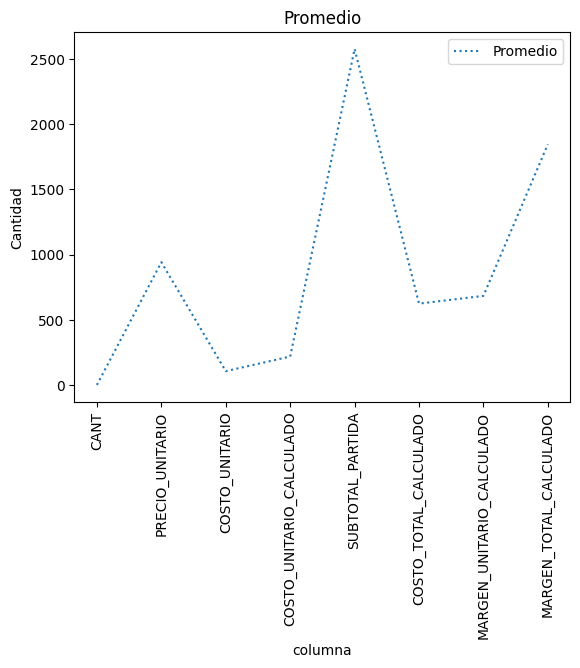

In [ ]:
import matplotlib.pyplot as plt
a=Promedio
plt.plot(a,label='Promedio',linestyle="dotted")

plt.ylabel("Cantidad")
plt.xlabel("columna")

#agregar el nombre 
plt.legend()
plt.xticks(rotation=90)

plt.title("Promedio")
plt.show()



> **Medidas de dispersión**

1.   Rango = Diferencia entre el valor más pequeño y el más grande 
2.   Varianza = Representa la variabilidad de una serie de datos
3.   Desviación Estandár = Mide la dispersion de los datos respecto al promedio 

In [ ]:
print("Rango= \n")
print(data5_iqr.max()-data5_iqr.min(),"\n")

print("Varianza= \n")
print(data5_iqr.var(ddof=0),"\n")#especifica que es para poblacion= 0,para muestra =1 

print("Desviacion Estandar= \n")
print(data5_iqr.std(ddof=0),"\n")

print("Coeficiente de variacion= \n")
print(data5_iqr.std(ddof=0)/data5_iqr.mean())

Rango= 

CANT                             7.00
PRECIO_UNITARIO               2907.86
COSTO_UNITARIO                 567.27
COSTO_UNITARIO_CALCULADO       806.14
SUBTOTAL_PARTIDA             10558.65
COSTO_TOTAL_CALCULADO         2964.18
MARGEN_UNITARIO_CALCULADO     2667.89
MARGEN_TOTAL_CALCULADO        8382.33
dtype: float64 

Varianza= 

CANT                         2.713145e+00
PRECIO_UNITARIO              3.453485e+05
COSTO_UNITARIO               1.594050e+04
COSTO_UNITARIO_CALCULADO     2.953817e+04
SUBTOTAL_PARTIDA             4.979351e+06
COSTO_TOTAL_CALCULADO        3.870713e+05
MARGEN_UNITARIO_CALCULADO    1.870439e+05
MARGEN_TOTAL_CALCULADO       2.569657e+06
dtype: float64 

Desviacion Estandar= 

CANT                            1.647163
PRECIO_UNITARIO               587.663582
COSTO_UNITARIO                126.255688
COSTO_UNITARIO_CALCULADO      171.866726
SUBTOTAL_PARTIDA             2231.446006
COSTO_TOTAL_CALCULADO         622.150549
MARGEN_UNITARIO_CALCULADO     432.48

In [ ]:
rango=data5_iqr.max()-data5_iqr.min()
varianza=data5_iqr.var(ddof=0)#especifica que es para poblacion= 0,para muestra =1 
desvest=data5_iqr.std(ddof=0)
coef_variacion=data5_iqr.std(ddof=0)/data5_iqr.mean()

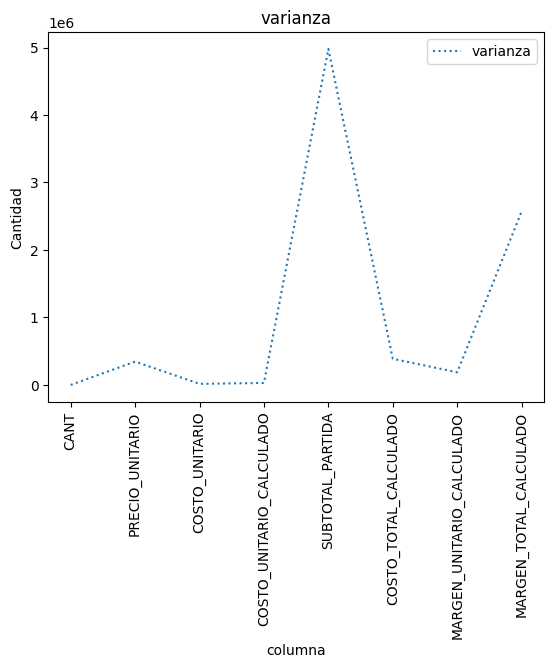

In [ ]:
import matplotlib.pyplot as plt
a=varianza
plt.plot(a,label='varianza',linestyle="dotted")

plt.ylabel("Cantidad")
plt.xlabel("columna")

#agregar el nombre 
plt.legend()
plt.xticks(rotation=90)

plt.title("varianza")
plt.show()

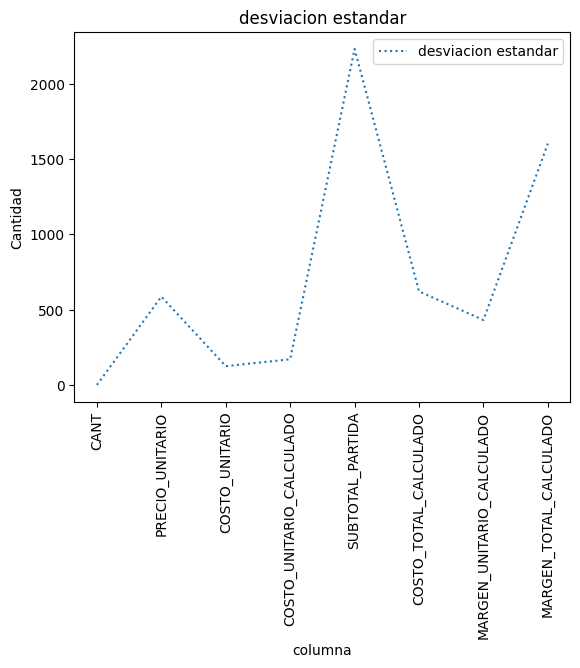

In [ ]:
import matplotlib.pyplot as plt
a=desvest
plt.plot(a,label='desviacion estandar',linestyle="dotted")

plt.ylabel("Cantidad")
plt.xlabel("columna")

#agregar el nombre 
plt.legend()
plt.xticks(rotation=90)

plt.title("desviacion estandar")
plt.show()

> **Análisis de cuartiles e incorporación de elementos gráficos para mostrar los datos**

1. Cuartiles = Divide la distribucion en 4 partes iguales(25%,50%,75%,100%) 
2. Deciles = En 10 partes(10%-90%)
3. Percentiles= en 100 partes (1%-99%) 

In [ ]:
#pandas calcula los percentiles incluyentes 
print("percentil 25: \n",data5_iqr.quantile(q=0.25),"\n")
print("percentil 50: \n",data5_iqr.quantile(),"\n")# por defecto da el porcentil 50
print("percentil 75: \n",data5_iqr.quantile(q=0.75),"\n")

percentil 25: 
 CANT                           1.0000
PRECIO_UNITARIO              528.4475
COSTO_UNITARIO                 0.0000
COSTO_UNITARIO_CALCULADO      89.8825
SUBTOTAL_PARTIDA             952.0750
COSTO_TOTAL_CALCULADO        172.8500
MARGEN_UNITARIO_CALCULADO    397.0075
MARGEN_TOTAL_CALCULADO       696.5225
Name: 0.25, dtype: float64 

percentil 50: 
 CANT                            2.000
PRECIO_UNITARIO               825.000
COSTO_UNITARIO                 77.350
COSTO_UNITARIO_CALCULADO      195.345
SUBTOTAL_PARTIDA             2050.870
COSTO_TOTAL_CALCULADO         444.135
MARGEN_UNITARIO_CALCULADO     643.560
MARGEN_TOTAL_CALCULADO       1534.380
Name: 0.5, dtype: float64 

percentil 75: 
 CANT                            3.0000
PRECIO_UNITARIO              1155.8750
COSTO_UNITARIO                156.7075
COSTO_UNITARIO_CALCULADO      287.4275
SUBTOTAL_PARTIDA             3200.0000
COSTO_TOTAL_CALCULADO         747.3375
MARGEN_UNITARIO_CALCULADO     832.2850
MARGEN_TOTAL_C

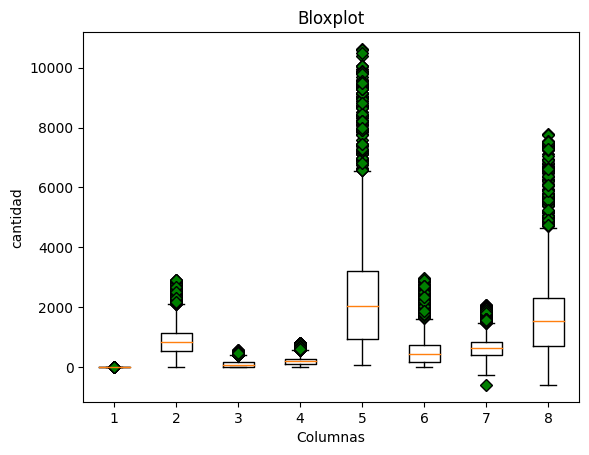

In [ ]:
y=data5_iqr#["Existencia"]
#plt.boxplot(y)
plt.ylabel("cantidad")
plt.xlabel("Columnas")

plt.title("Bloxplot")

green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(y,flierprops=green_diamond)
plt.show()

<Figure size 1500x800 with 0 Axes>

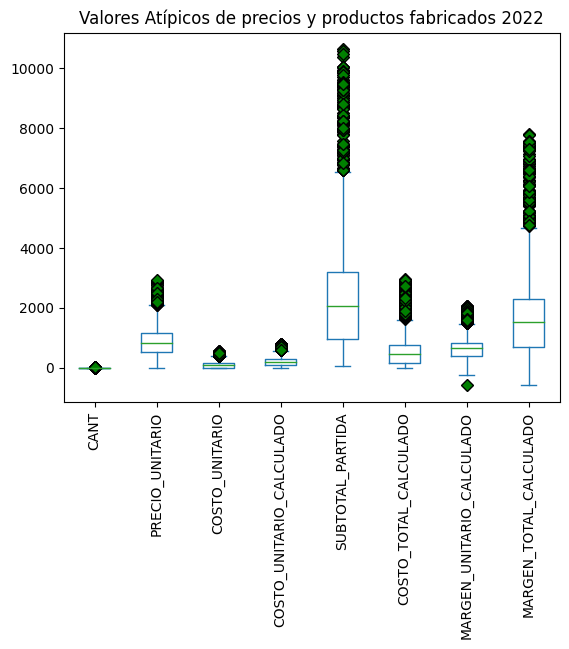

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
green_diamond = dict(markerfacecolor='g', marker='D')
data5_iqr.plot(kind='box', vert=True,flierprops=green_diamond)
plt.xticks(rotation=90)

#green_diamond = dict(markerfacecolor='g', marker='D')
#plt.boxplot(y,flierprops=green_diamond)

plt.title("Valores Atípicos de precios y productos fabricados 2022")
plt.show() #dibujamos el diagrama

In [ ]:
from scipy import stats
df_ppf = data5_iqr[(np.abs(stats.zscore(data5_iqr)) < 3).all(axis=1)]

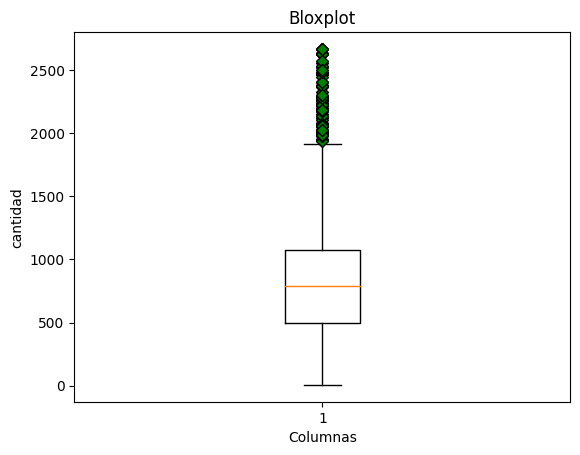

In [ ]:
y=df_ppf["PRECIO_UNITARIO"]
#plt.boxplot(y)
plt.ylabel("cantidad")
plt.xlabel("Columnas")

plt.title("Bloxplot")

green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(y,flierprops=green_diamond)
plt.show()

### **Archivo: Gastos y Costos 2022**

> **Medidas de Tendencia Central**

In [ ]:
print("Promedio =\n")
print(data2_iqr.mean(),"\n")

print("Mediana =\n")
data2_iqr.median()

Promedio =

IMPORTE     1440.692736
IVA          171.457366
TOTAL MX    1660.038235
dtype: float64 

Mediana =



IMPORTE     701.275
IVA          77.810
TOTAL MX    812.000
dtype: float64

In [ ]:
print("Moda =\n")
data2_iqr.mode()

Moda =



,IMPORTE,IVA,TOTAL MX
0,0.0,0.0,0.0


In [ ]:
Promedio2 =data2_iqr.mean()
Mediana2 = data2_iqr.median()

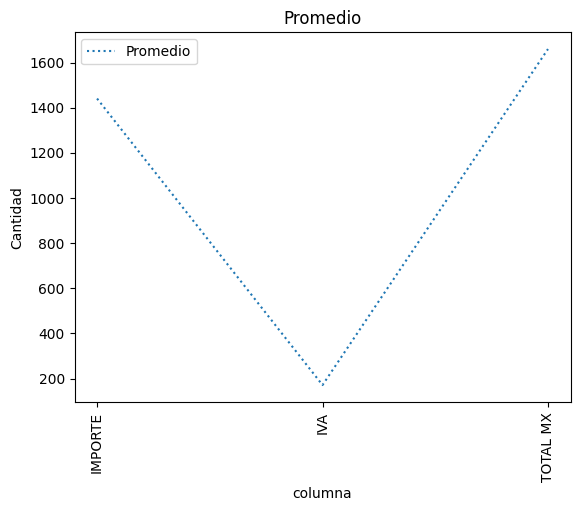

In [ ]:
import matplotlib.pyplot as plt
a=Promedio2
plt.plot(a,label='Promedio',linestyle="dotted")

plt.ylabel("Cantidad")
plt.xlabel("columna")

#agregar el nombre 
plt.legend()
plt.xticks(rotation=90)

plt.title("Promedio")
plt.show()

> **Medidas de dispersión**

1.   Rango = Diferencia entre el valor más pequeño y el más grande 
2.   Varianza = Representa la variabilidad de una serie de datos
3.   Desviación Estandár = Mide la dispersion de los datos respecto al promedio 

In [ ]:
print("Rango= \n")
print(data2_iqr.max()-data2_iqr.min(),"\n")

print("Varianza= \n")
print(data2_iqr.var(ddof=0),"\n")#especifica que es para poblacion= 0,para muestra =1 

print("Desviacion Estandar= \n")
print(data2_iqr.std(ddof=0),"\n")

print("Coeficiente de variacion= \n")
print(data2_iqr.std(ddof=0)/data2_iqr.mean())

Rango= 

IMPORTE     13556.21
IVA          1527.61
TOTAL MX    15573.58
dtype: float64 

Varianza= 

IMPORTE     3.871099e+06
IVA         5.762649e+04
TOTAL MX    5.143444e+06
dtype: float64 

Desviacion Estandar= 

IMPORTE     1967.510879
IVA          240.055174
TOTAL MX    2267.916310
dtype: float64 

Coeficiente de variacion= 

IMPORTE     1.365670
IVA         1.400087
TOTAL MX    1.366183
dtype: float64


In [ ]:
rango2=data2_iqr.max()-data2_iqr.min()
varianza2=data2_iqr.var(ddof=0)#especifica que es para poblacion= 0,para muestra =1 
desvest2=data2_iqr.std(ddof=0)
coef_variacion2=data2_iqr.std(ddof=0)/data2_iqr.mean()

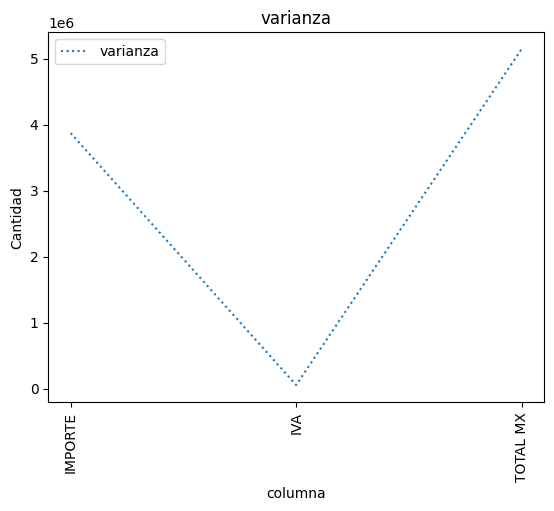

In [ ]:
import matplotlib.pyplot as plt
a=varianza2
plt.plot(a,label='varianza',linestyle="dotted")

plt.ylabel("Cantidad")
plt.xlabel("columna")

#agregar el nombre 
plt.legend()
plt.xticks(rotation=90)

plt.title("varianza")
plt.show()

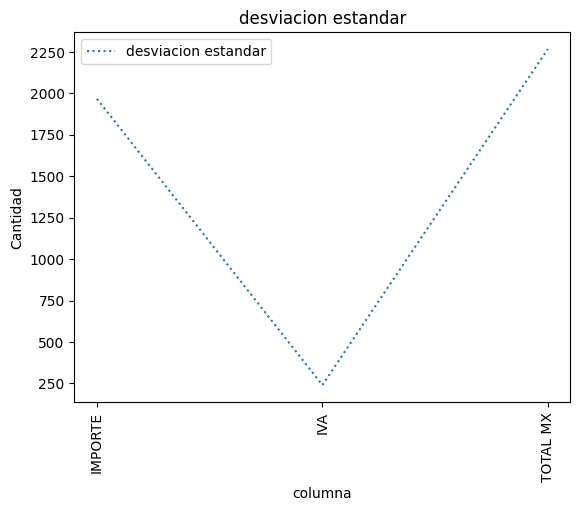

In [ ]:
import matplotlib.pyplot as plt
a=desvest2
plt.plot(a,label='desviacion estandar',linestyle="dotted")

plt.ylabel("Cantidad")
plt.xlabel("columna")

#agregar el nombre 
plt.legend()
plt.xticks(rotation=90)

plt.title("desviacion estandar")
plt.show()

> **Análisis de cuartiles e incorporación de elementos gráficos para mostrar los datos**

1. Cuartiles = Divide la distribucion en 4 partes iguales(25%,50%,75%,100%) 
2. Deciles = En 10 partes(10%-90%)
3. Percentiles= en 100 partes (1%-99%) 

In [ ]:
#pandas calcula los percentiles incluyentes 
print("percentil 25: \n",data2_iqr.quantile(q=0.25),"\n")
print("percentil 50: \n",data2_iqr.quantile(),"\n")# por defecto da el porcentil 50
print("percentil 75: \n",data2_iqr.quantile(q=0.75),"\n")

percentil 25: 
 IMPORTE     0.0
IVA         0.0
TOTAL MX    0.0
Name: 0.25, dtype: float64 

percentil 50: 
 IMPORTE     701.275
IVA          77.810
TOTAL MX    812.000
Name: 0.5, dtype: float64 

percentil 75: 
 IMPORTE     1797.7425
IVA          216.0000
TOTAL MX    2088.0000
Name: 0.75, dtype: float64 



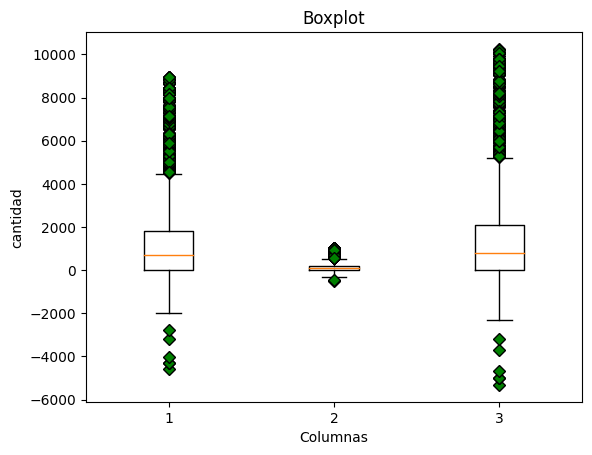

In [ ]:
y=data2_iqr#["Existencia"]
#plt.boxplot(y)
plt.ylabel("cantidad")
plt.xlabel("Columnas")

plt.title("Boxplot")

green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(y,flierprops=green_diamond)
plt.show()

<Figure size 1500x800 with 0 Axes>

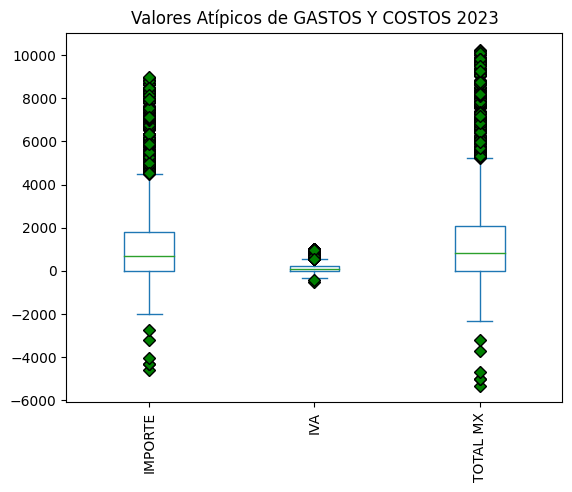

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig2 = plt.figure(figsize =(15, 8))
green_diamond = dict(markerfacecolor='g', marker='D')
data2_iqr.plot(kind='box', vert=True,flierprops=green_diamond)
plt.xticks(rotation=90)

#green_diamond = dict(markerfacecolor='g', marker='D')
#plt.boxplot(y,flierprops=green_diamond)

plt.title("Valores Atípicos de GASTOS Y COSTOS 2023")
plt.show() #dibujamos el diagrama

In [ ]:
from scipy import stats
df22 = data2_iqr[(np.abs(stats.zscore(data2_iqr)) < 3).all(axis=1)]

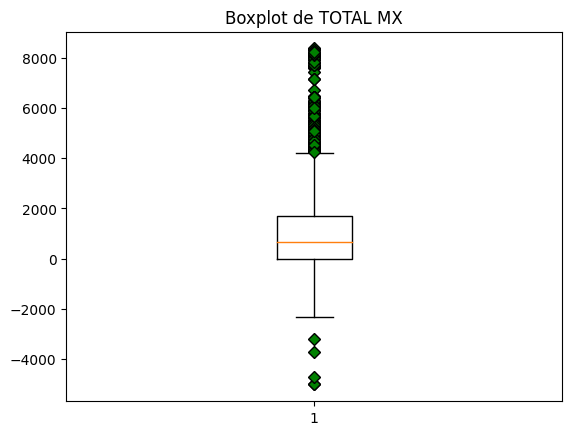

In [ ]:
y=df22["TOTAL MX"]
#plt.boxplot(y)

plt.title("Boxplot de TOTAL MX")

green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(y,flierprops=green_diamond)
plt.show()

### **Archivo: GASTOS Y COSTOS 2023**

> **Medidas de Tendencia Central**


In [ ]:
print("Promedio =\n")
print(data6_iqr.mean(),"\n")

print("Mediana =\n")
data6_iqr.median()

Promedio =

Importe     1521.496020
IVA          176.791108
TOTAL MX    1844.963048
dtype: float64 

Mediana =



Importe     770.00
IVA          75.17
TOTAL MX    893.20
dtype: float64

In [ ]:
print("Moda =\n")
data6_iqr.mode()

Moda =



,Importe,IVA,TOTAL MX
0,0.0,0.0,0.0


In [ ]:
Promedio3 =data6_iqr.mean()
Mediana3 = data6_iqr.median()

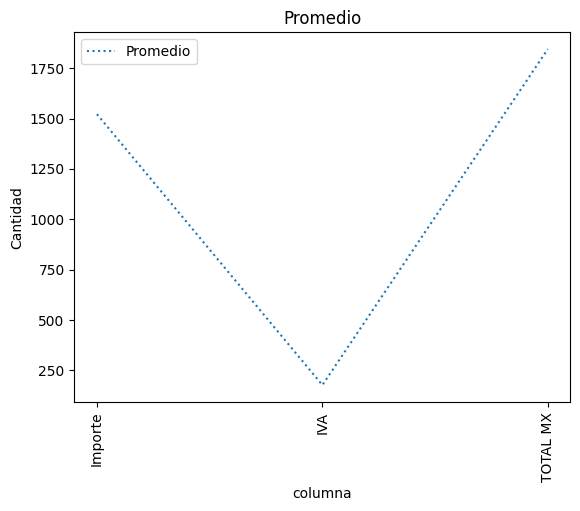

In [ ]:
import matplotlib.pyplot as plt
a=Promedio3
plt.plot(a,label='Promedio',linestyle="dotted")

plt.ylabel("Cantidad")
plt.xlabel("columna")

#agregar el nombre 
plt.legend()
plt.xticks(rotation=90)

plt.title("Promedio")
plt.show()

> **Medidas de dispersión**

1.   Rango = Diferencia entre el valor más pequeño y el más grande 
2.   Varianza = Representa la variabilidad de una serie de datos
3.   Desviación Estandár = Mide la dispersion de los datos respecto al promedio 

In [ ]:
print("Rango= \n")
print(data6_iqr.max()-data6_iqr.min(),"\n")

print("Varianza= \n")
print(data6_iqr.var(ddof=0),"\n")#especifica que es para poblacion= 0,para muestra =1 

print("Desviacion Estandar= \n")
print(data6_iqr.std(ddof=0),"\n")

print("Coeficiente de variacion= \n")
print(data6_iqr.std(ddof=0)/data6_iqr.mean())

Rango= 

Importe      9965.00
IVA          1246.71
TOTAL MX    11559.40
dtype: float64 

Varianza= 

Importe     3.911364e+06
IVA         5.860027e+04
TOTAL MX    5.948099e+06
dtype: float64 

Desviacion Estandar= 

Importe     1977.716817
IVA          242.074934
TOTAL MX    2438.872554
dtype: float64 

Coeficiente de variacion= 

Importe     1.299850
IVA         1.369271
TOTAL MX    1.321909
dtype: float64


In [ ]:
rango23=data6_iqr.max()-data6_iqr.min()
varianza23=data6_iqr.var(ddof=0)#especifica que es para poblacion= 0,para muestra =1 
desvest23=data6_iqr.std(ddof=0)
coef_variacion23=data6_iqr.std(ddof=0)/data6_iqr.mean()

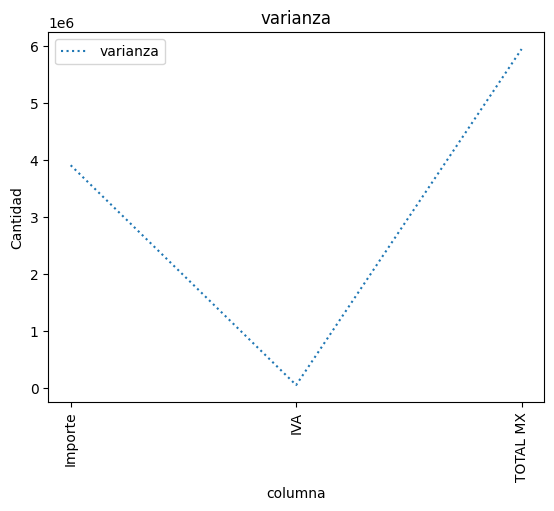

In [ ]:
import matplotlib.pyplot as plt
a=varianza23
plt.plot(a,label='varianza',linestyle="dotted")

plt.ylabel("Cantidad")
plt.xlabel("columna")

#agregar el nombre 
plt.legend()
plt.xticks(rotation=90)

plt.title("varianza")
plt.show()

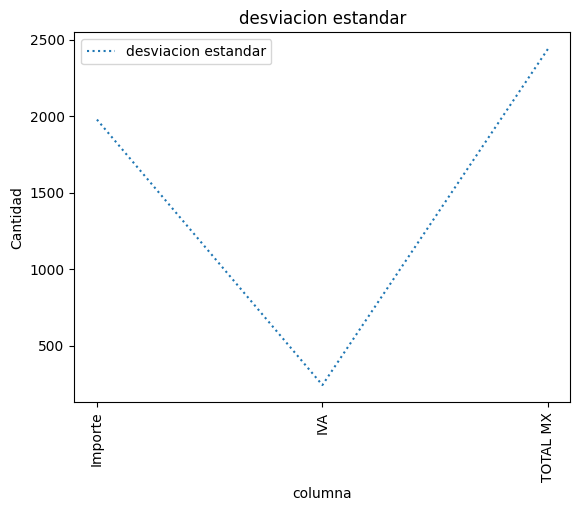

In [ ]:
import matplotlib.pyplot as plt
a=desvest23
plt.plot(a,label='desviacion estandar',linestyle="dotted")

plt.ylabel("Cantidad")
plt.xlabel("columna")

#agregar el nombre 
plt.legend()
plt.xticks(rotation=90)

plt.title("desviacion estandar")
plt.show()

> **Análisis de cuartiles e incorporación de elementos gráficos para mostrar los datos**

1. Cuartiles = Divide la distribucion en 4 partes iguales(25%,50%,75%,100%) 
2. Deciles = En 10 partes(10%-90%)
3. Percentiles= en 100 partes (1%-99%) 

In [ ]:
#pandas calcula los percentiles incluyentes 
print("percentil 25: \n",data6_iqr.quantile(q=0.25),"\n")
print("percentil 50: \n",data6_iqr.quantile(),"\n")# por defecto da el porcentil 50
print("percentil 75: \n",data6_iqr.quantile(q=0.75),"\n")

percentil 25: 
 Importe     116.38
IVA           0.00
TOTAL MX    135.00
Name: 0.25, dtype: float64 

percentil 50: 
 Importe     770.00
IVA          75.17
TOTAL MX    893.20
Name: 0.5, dtype: float64 

percentil 75: 
 Importe     1960.00
IVA          232.32
TOTAL MX    2302.95
Name: 0.75, dtype: float64 



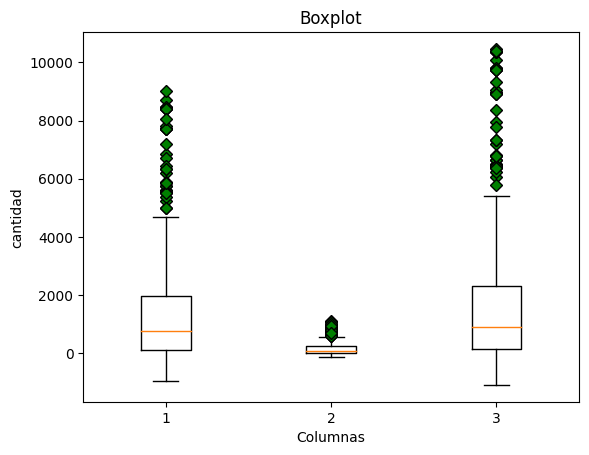

In [ ]:
y=data6_iqr#["Existencia"]
#plt.boxplot(y)
plt.ylabel("cantidad")
plt.xlabel("Columnas")

plt.title("Boxplot")

green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(y,flierprops=green_diamond)
plt.show()

<Figure size 1500x800 with 0 Axes>

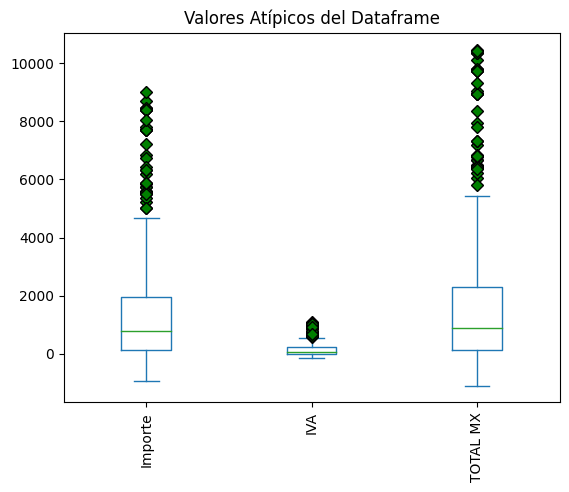

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig23 = plt.figure(figsize =(15, 8))
green_diamond = dict(markerfacecolor='g', marker='D')
data6_iqr.plot(kind='box', vert=True,flierprops=green_diamond)
plt.xticks(rotation=90)

#green_diamond = dict(markerfacecolor='g', marker='D')
#plt.boxplot(y,flierprops=green_diamond)

plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [ ]:
from scipy import stats
df23 = data6_iqr[(np.abs(stats.zscore(data6_iqr)) < 3).all(axis=1)]

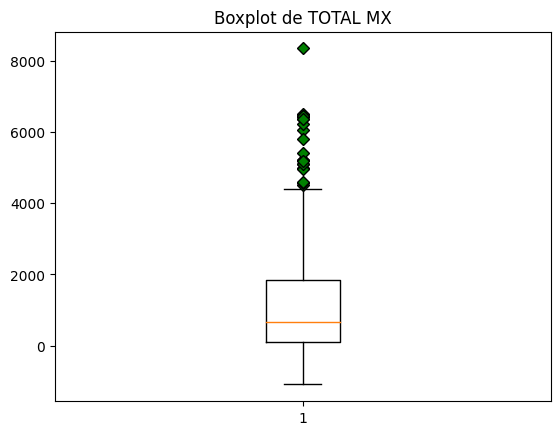

In [ ]:
y=df23["TOTAL MX"]
#plt.boxplot(y)

plt.title("Boxplot de TOTAL MX")

green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(y,flierprops=green_diamond)
plt.show()

### **Archivo: DATOS DE FACTURACIÓN**

> **Medidas de Tendencia Central**

In [ ]:
print("Promedio =\n")
print(datafact2_iqr.mean(),"\n")

print("Mediana =\n")
datafact2_iqr.median()

Promedio =

CVE_CLPV    5198.450757
CVE_VEND       2.000000
CAN_TOT     1955.017827
DES_TOT        0.000000
DES_FIN        0.000000
dtype: float64 

Mediana =



CVE_CLPV    5926.0
CVE_VEND       2.0
CAN_TOT     1455.7
DES_TOT        0.0
DES_FIN        0.0
dtype: float64

In [ ]:
print("Moda =\n")
datafact2_iqr.mode()

Moda =



,CVE_CLPV,CVE_VEND,CAN_TOT,DES_TOT,DES_FIN
0,5926.0,2.0,1955.0,0.0,0


In [ ]:
Promediofact = datafact2_iqr.mean()
Medianafact = datafact2_iqr.median()

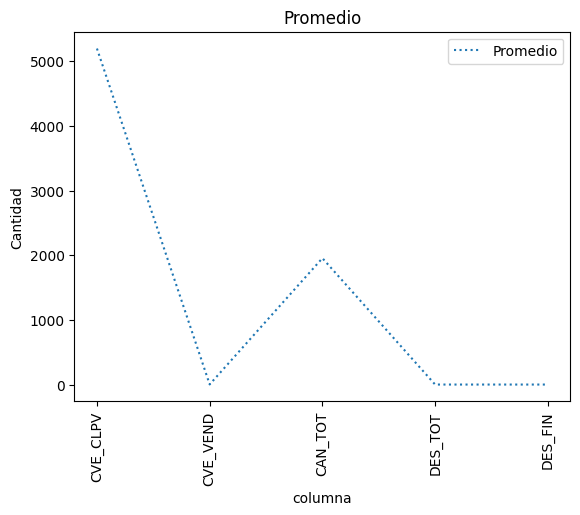

In [ ]:
import matplotlib.pyplot as plt
a=Promediofact
plt.plot(a,label='Promedio',linestyle="dotted")

plt.ylabel("Cantidad")
plt.xlabel("columna")

#agregar el nombre 
plt.legend()
plt.xticks(rotation=90)

plt.title("Promedio")
plt.show()

> **Medidas de dispersión**

1.   Rango = Diferencia entre el valor más pequeño y el más grande 
2.   Varianza = Representa la variabilidad de una serie de datos
3.   Desviación Estandár = Mide la dispersion de los datos respecto al promedio 

In [ ]:
print("Rango= \n")
print(datafact2_iqr.max()-datafact2_iqr.min(),"\n")

print("Varianza= \n")
print(datafact2_iqr.var(ddof=0),"\n")#especifica que es para poblacion= 0,para muestra =1 

print("Desviacion Estandar= \n")
print(datafact2_iqr.std(ddof=0),"\n")

print("Coeficiente de variacion= \n")
print(datafact2_iqr.std(ddof=0)/datafact2_iqr.mean())

Rango= 

CVE_CLPV    9579.0
CVE_VEND       0.0
CAN_TOT     9005.9
DES_TOT        0.0
DES_FIN        0.0
dtype: float64 

Varianza= 

CVE_CLPV    5.946214e+06
CVE_VEND    0.000000e+00
CAN_TOT     3.507761e+06
DES_TOT     0.000000e+00
DES_FIN     0.000000e+00
dtype: float64 

Desviacion Estandar= 

CVE_CLPV    2438.486063
CVE_VEND       0.000000
CAN_TOT     1872.901701
DES_TOT        0.000000
DES_FIN        0.000000
dtype: float64 

Coeficiente de variacion= 

CVE_CLPV    0.469079
CVE_VEND    0.000000
CAN_TOT     0.957997
DES_TOT          NaN
DES_FIN          NaN
dtype: float64


In [ ]:
rangofact=datafact2_iqr.max()-datafact2_iqr.min()
varianzafact=datafact2_iqr.var(ddof=0)#especifica que es para poblacion= 0,para muestra =1 
desvestfact=datafact2_iqr.std(ddof=0)
coef_variacionfact=datafact2_iqr.std(ddof=0)/datafact2_iqr.mean()

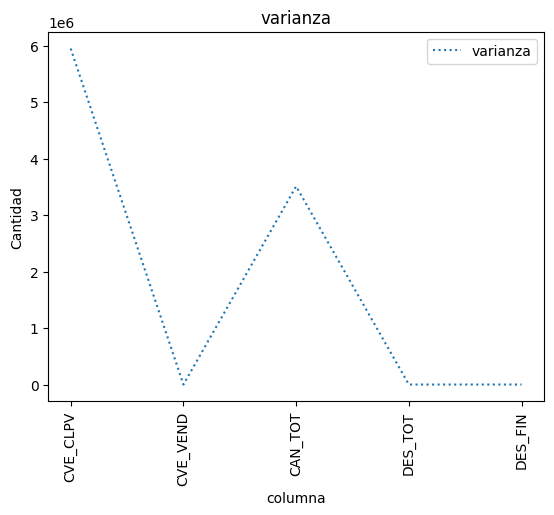

In [ ]:
import matplotlib.pyplot as plt
a=varianzafact
plt.plot(a,label='varianza',linestyle="dotted")

plt.ylabel("Cantidad")
plt.xlabel("columna")

#agregar el nombre 
plt.legend()
plt.xticks(rotation=90)

plt.title("varianza")
plt.show()

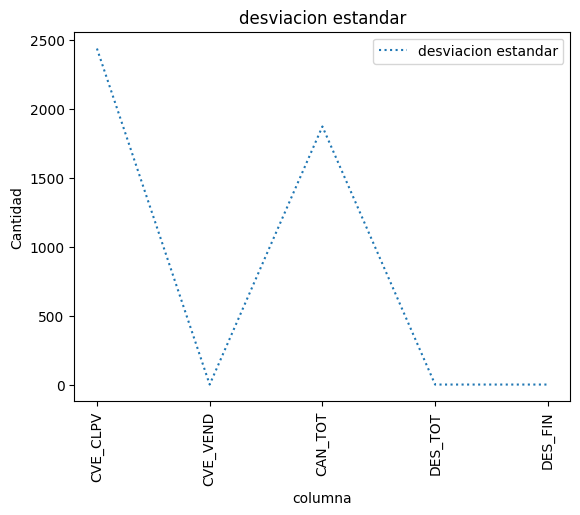

In [ ]:
import matplotlib.pyplot as plt
a=desvestfact
plt.plot(a,label='desviacion estandar',linestyle="dotted")

plt.ylabel("Cantidad")
plt.xlabel("columna")

#agregar el nombre 
plt.legend()
plt.xticks(rotation=90)

plt.title("desviacion estandar")
plt.show()

> **Análisis de cuartiles e incorporación de elementos gráficos para mostrar los datos**

1. Cuartiles = Divide la distribucion en 4 partes iguales(25%,50%,75%,100%) 
2. Deciles = En 10 partes(10%-90%)
3. Percentiles= en 100 partes (1%-99%) 

In [ ]:
#pandas calcula los percentiles incluyentes 
print("percentil 25: \n",datafact2_iqr.quantile(q=0.25),"\n")
print("percentil 50: \n",datafact2_iqr.quantile(),"\n")# por defecto da el porcentil 50
print("percentil 75: \n",datafact2_iqr.quantile(q=0.75),"\n")

percentil 25: 
 CVE_CLPV    3521.000
CVE_VEND       2.000
CAN_TOT      575.861
DES_TOT        0.000
DES_FIN        0.000
Name: 0.25, dtype: float64 

percentil 50: 
 CVE_CLPV    5926.0
CVE_VEND       2.0
CAN_TOT     1455.7
DES_TOT        0.0
DES_FIN        0.0
Name: 0.5, dtype: float64 

percentil 75: 
 CVE_CLPV    6839.0
CVE_VEND       2.0
CAN_TOT     2425.5
DES_TOT        0.0
DES_FIN        0.0
Name: 0.75, dtype: float64 



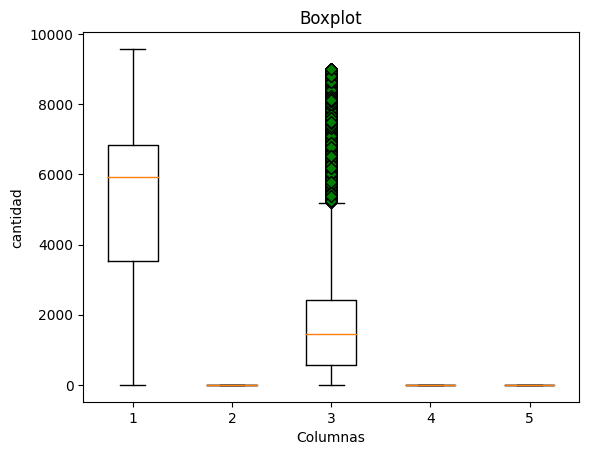

In [ ]:
y=datafact2_iqr#["Existencia"]
#plt.boxplot(y)
plt.ylabel("cantidad")
plt.xlabel("Columnas")

plt.title("Boxplot")

green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(y,flierprops=green_diamond)
plt.show()

<Figure size 1500x800 with 0 Axes>

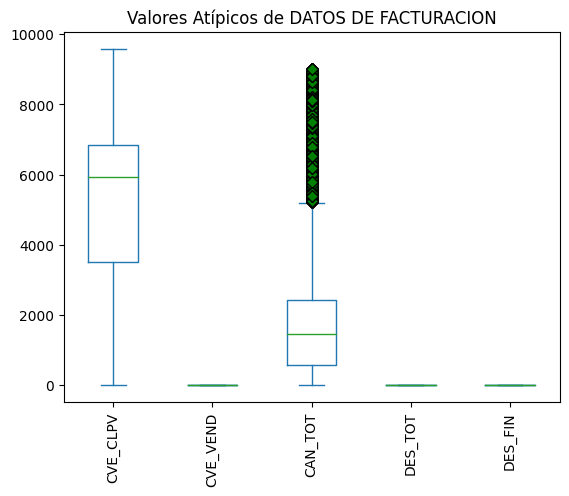

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig2 = plt.figure(figsize =(15, 8))
green_diamond = dict(markerfacecolor='g', marker='D')
datafact2_iqr.plot(kind='box', vert=True,flierprops=green_diamond)
plt.xticks(rotation=90)

#green_diamond = dict(markerfacecolor='g', marker='D')
#plt.boxplot(y,flierprops=green_diamond)

plt.title("Valores Atípicos de DATOS DE FACTURACION")
plt.show() #dibujamos el diagrama

In [ ]:
from scipy import stats
df_fact = datafact2_iqr[(np.abs(stats.zscore(datafact2_iqr)) < 3).all(axis=1)]

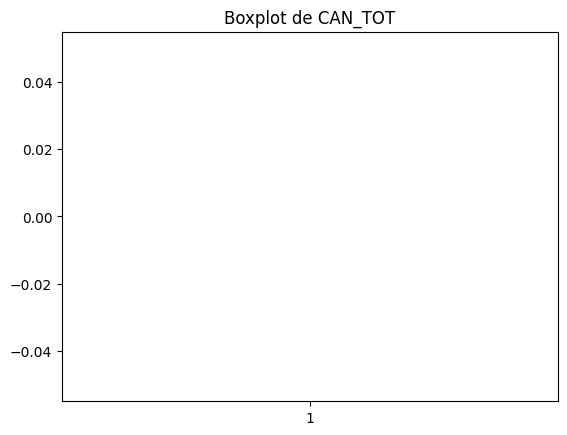

In [ ]:
y=df_fact["CAN_TOT"]
#plt.boxplot(y)

plt.title("Boxplot de CAN_TOT")

green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(y,flierprops=green_diamond)
plt.show()

# **MODELOS DE REGRESION LINEAL MULTIPLE**

### **Archivo: Detalle precios y productos fabricados 2022**

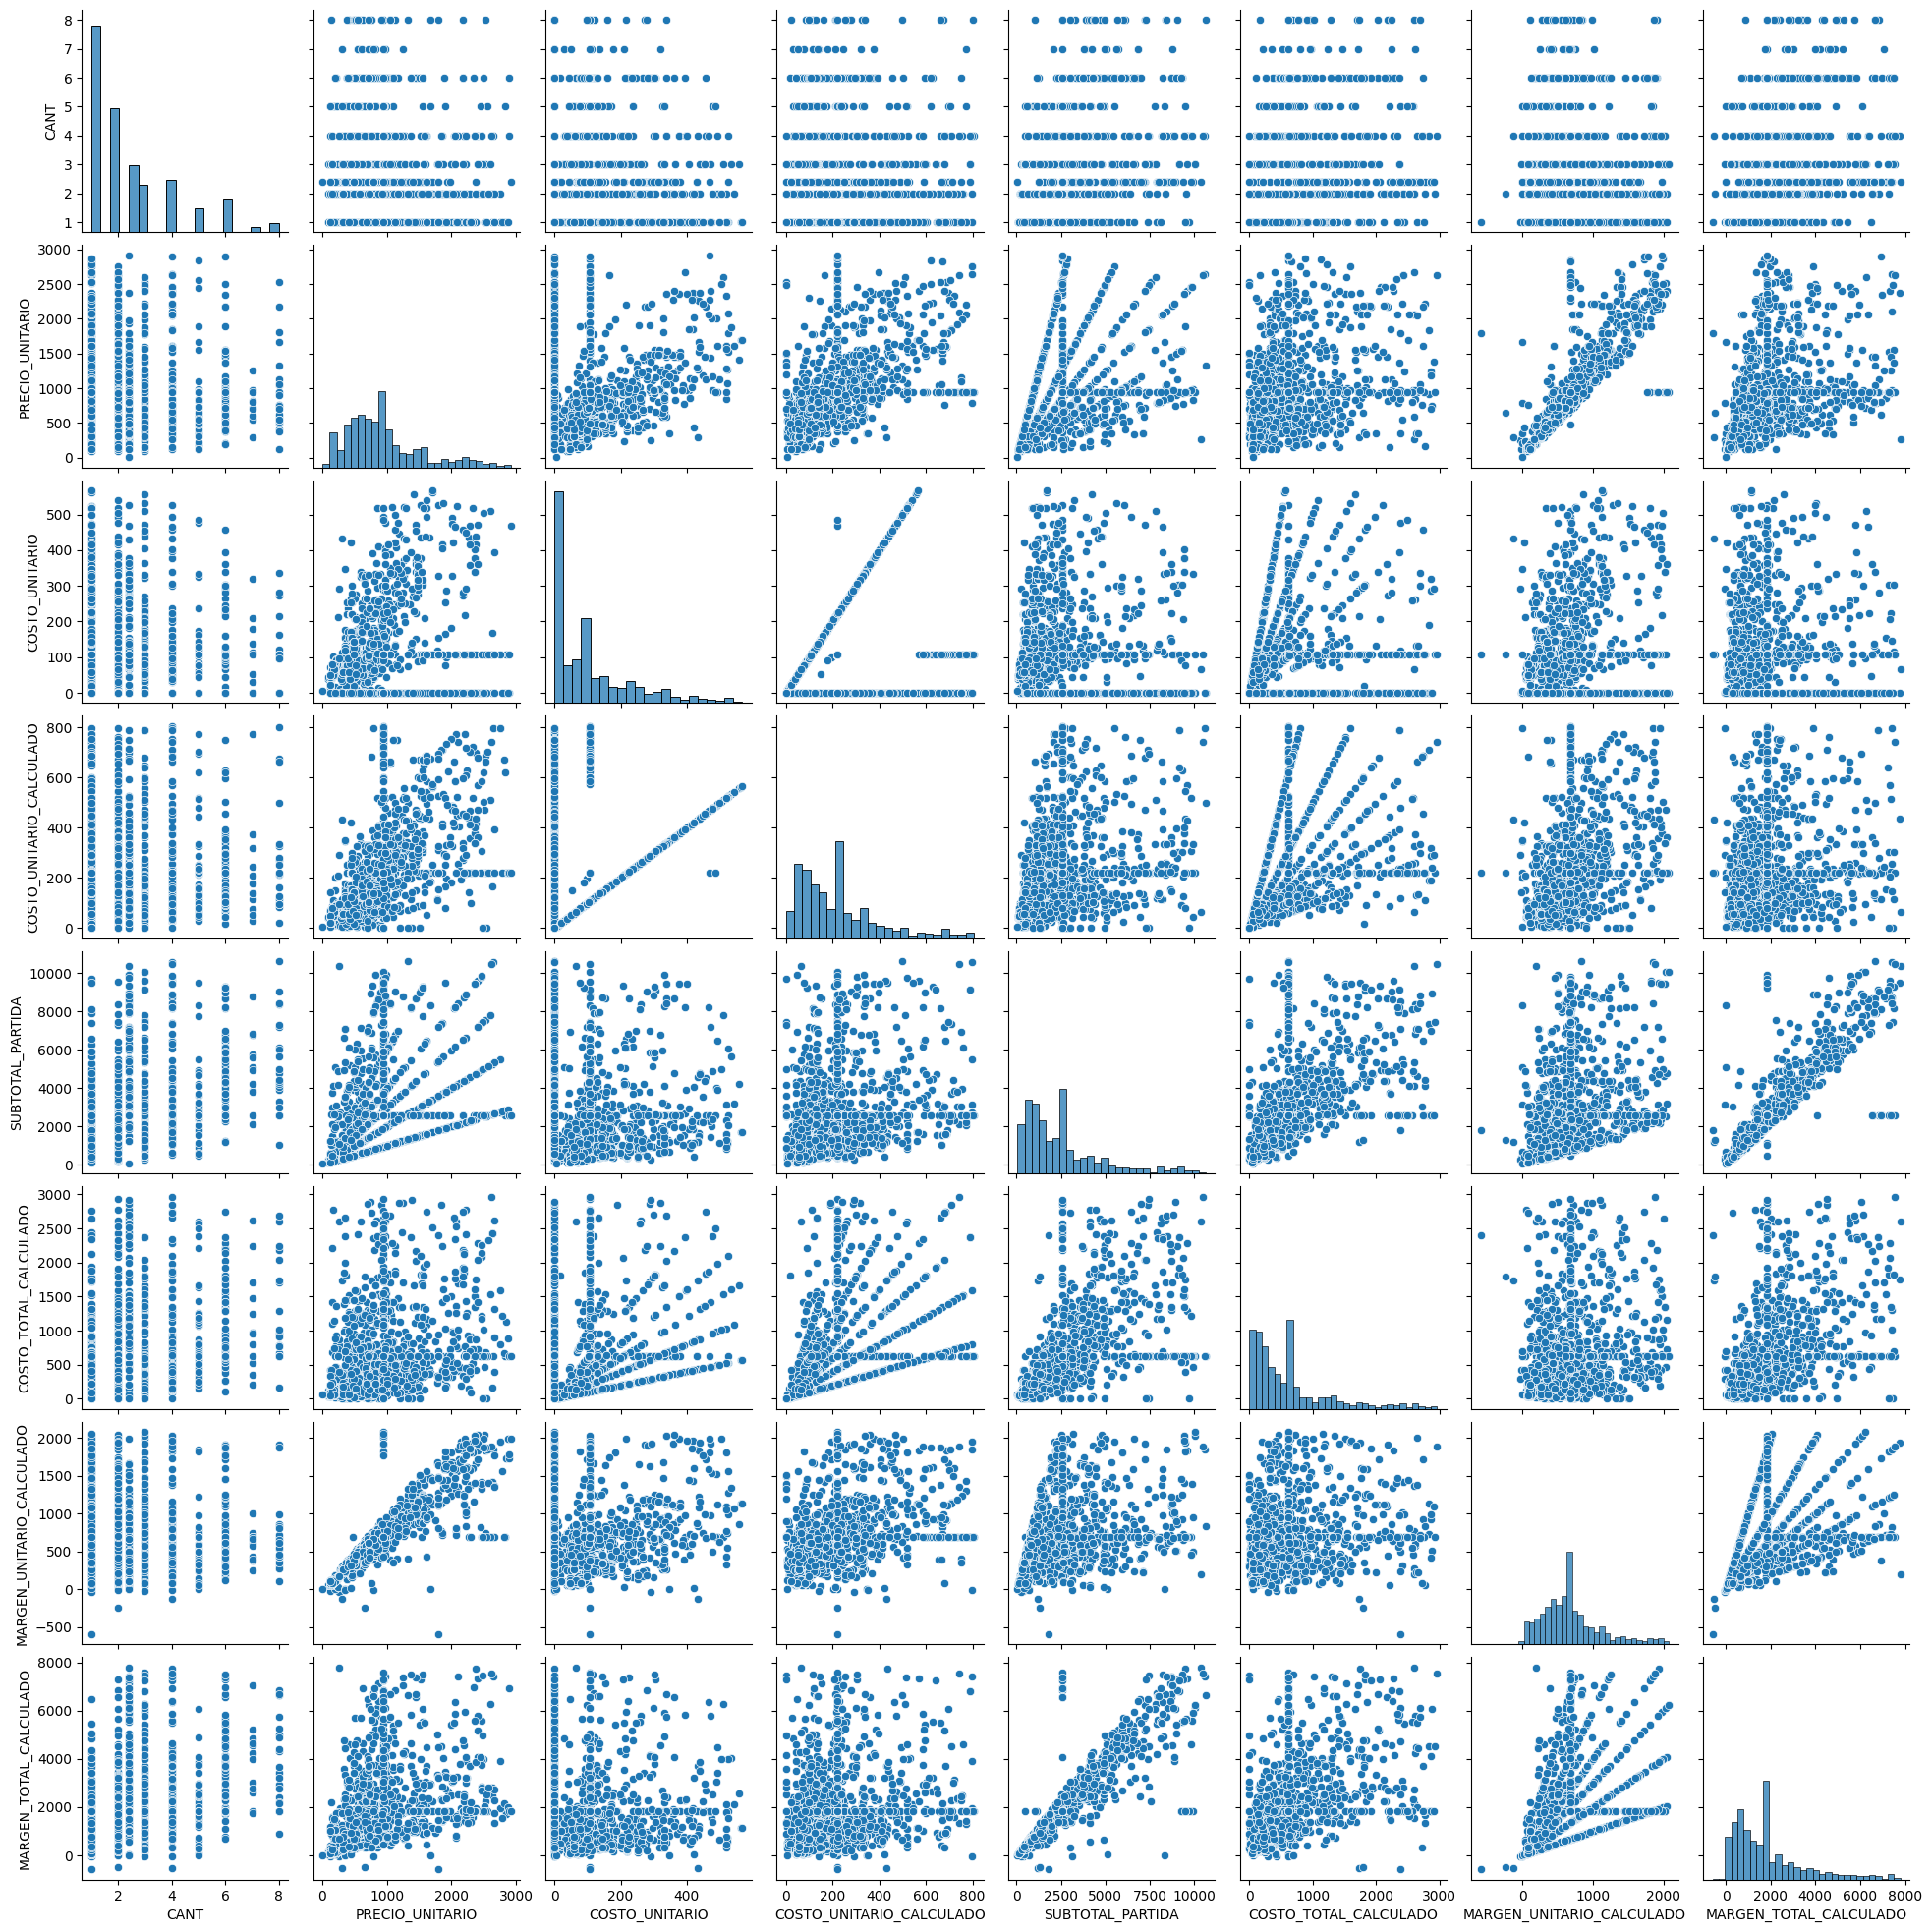

In [ ]:
#Graficamos todas las dispersiones entre todas las variables
import seaborn as sns
sns.pairplot(df_limpio)

In [ ]:
df_limpio.head(5)

,CVE_DOC,FECHA_DOC,NOMBRE,NOMBRE.1,CVE_ART,DESCR,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,F37034,05/01/2022 00:00,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,TUE00244,"TUB COBRE 5/16""ØX165MM CIRCULA1.5KW127V",1.0,434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,F37036,05/01/2022 00:00,LETICIA RAMIREZ HERNANDEZ,JUAN ANTONIO RESENDIZ UGALDE,TUA00028,"TUA U"" 5/16 ØX250MM 1200W 120V TAP1""NPT",1.0,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,F37041,05/01/2022 00:00,DIEGO ARMANDO LEON DURAN,ANA BARBARA CRUZ PALACIOS,TP0007,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 7 MT,7.0,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56
3,F37042,05/01/2022 00:00,DIEGO ARMANDO LEON DURAN,OMAR RODRIGUEZ GOMEZ,TP0001,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 1 MT,1.0,140.00,38.96,38.96,140.00,38.96,101.04,101.04
4,F37043,05/01/2022 00:00,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,BP00242,BAN P INOX 115MMX235MM 1000W 127V T/TOR,2.0,172.41,101.71,101.71,344.83,203.42,70.71,141.41



1.   **Variable dependiente** = MARGEN_TOTAL_CALCULADO 
2.   **Variables independientes** = SUBTOTAL_PARTIDA Y COSTO_TOTAL_CALCULADO 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='SUBTOTAL_PARTIDA', ylabel='MARGEN_TOTAL_CALCULADO'>

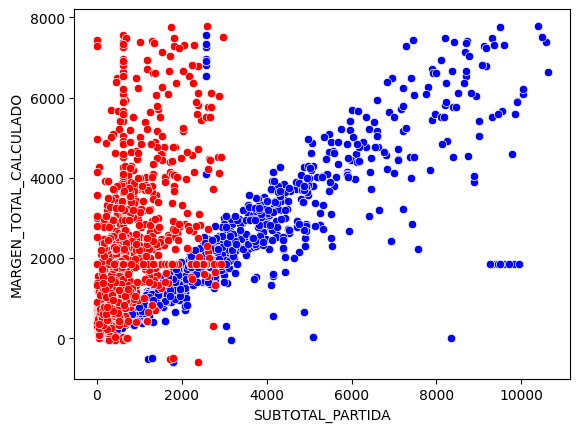

In [ ]:
from turtle import color


sns.scatterplot(x='SUBTOTAL_PARTIDA', y='MARGEN_TOTAL_CALCULADO', color="blue", data=df_limpio)
sns.scatterplot(x='COSTO_TOTAL_CALCULADO', y='MARGEN_TOTAL_CALCULADO', color="red", data=df_limpio)
#sns.scatterplot(x='no_previous', y='MARGEN_TOTAL_CALCULADO', color="yellow", data=df)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_limpio[['SUBTOTAL_PARTIDA', 'COSTO_TOTAL_CALCULADO']]#,'no_previous']]
Var_Dep= df_limpio['MARGEN_TOTAL_CALCULADO']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['SUBTOTAL_PARTIDA', 'COSTO_TOTAL_CALCULADO'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([ 0.64292356, -0.10308443]),
 'rank_': 2,
 'singular_': array([85692.30446183, 17588.27911488]),
 'intercept_': 254.13955938429785}

**Modelo matemático: y= 0.64292356x1 + -0.10308443x2 + 254.13955938429785**

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.7561384030613831

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=df_limpio[['SUBTOTAL_PARTIDA', 'COSTO_TOTAL_CALCULADO']])
y_pred

array([ 528.03412963, 1033.09992016, 2608.44466867, ..., 4278.90822568,
       3859.46777709, 1827.61794581])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df_limpio.insert(0, 'Predicciones', y_pred)
df_limpio

,Predicciones,CVE_DOC,FECHA_DOC,NOMBRE,NOMBRE.1,CVE_ART,DESCR,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,528.034130,F37034,05/01/2022 00:00,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,TUE00244,"TUB COBRE 5/16""ØX165MM CIRCULA1.5KW127V",1.0,434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,1033.099920,F37036,05/01/2022 00:00,LETICIA RAMIREZ HERNANDEZ,JUAN ANTONIO RESENDIZ UGALDE,TUA00028,"TUA U"" 5/16 ØX250MM 1200W 120V TAP1""NPT",1.0,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,2608.444669,F37041,05/01/2022 00:00,DIEGO ARMANDO LEON DURAN,ANA BARBARA CRUZ PALACIOS,TP0007,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 7 MT,7.0,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56
3,340.132688,F37042,05/01/2022 00:00,DIEGO ARMANDO LEON DURAN,OMAR RODRIGUEZ GOMEZ,TP0001,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 1 MT,1.0,140.00,38.96,38.96,140.00,38.96,101.04,101.04
4,454.869455,F37043,05/01/2022 00:00,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,BP00242,BAN P INOX 115MMX235MM 1000W 127V T/TOR,2.0,172.41,101.71,101.71,344.83,203.42,70.71,141.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,2937.427535,F39834,23/12/2022 00:00,LETICIA RAMIREZ HERNANDEZ,LUIS ENRIQUE PATIÑO PEREZ,CS12F1040A00,"CAS INOX 1/2""ØX3"" 400W 127V EXT.30CM",6.0,712.00,102.31,102.31,4272.00,613.88,609.69,3658.12
1422,2961.419386,F39834,23/12/2022 00:00,LETICIA RAMIREZ HERNANDEZ,LUIS ENRIQUE PATIÑO PEREZ,CS12H1050A00,"CAS INOX 1/2""ØX4"" 500W 127V EXT30CM",6.0,718.60,104.69,104.69,4311.60,628.12,613.91,3683.48
1423,4278.908226,F39835,23/12/2022 00:00,LETICIA RAMIREZ HERNANDEZ,SEVEN DAYS ALL SPORT,TUE00394,"TUB INOX 5/16""ØX300MM 5300W 220V ""M"" ESP",3.0,2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41
1424,3859.467777,F39837,23/12/2022 00:00,LETICIA RAMIREZ HERNANDEZ,REVUELTA MONTECARLO,TUA00470,"TUB INOX 1/2""ØX500MM 10KW 220V 2 1/2""NPT",1.0,942.70,108.00,219.90,5909.84,1884.35,684.80,4025.49


In [ ]:
df_limpio[["Predicciones","MARGEN_TOTAL_CALCULADO"]]

,Predicciones,MARGEN_TOTAL_CALCULADO
0,528.034130,381.68
1,1033.099920,936.87
2,2608.444669,2617.56
3,340.132688,101.04
4,454.869455,141.41
...,...,...
1421,2937.427535,3658.12
1422,2961.419386,3683.48
1423,4278.908226,4757.41
1424,3859.467777,4025.49


<Axes: xlabel='COSTO_TOTAL_CALCULADO', ylabel='MARGEN_TOTAL_CALCULADO'>

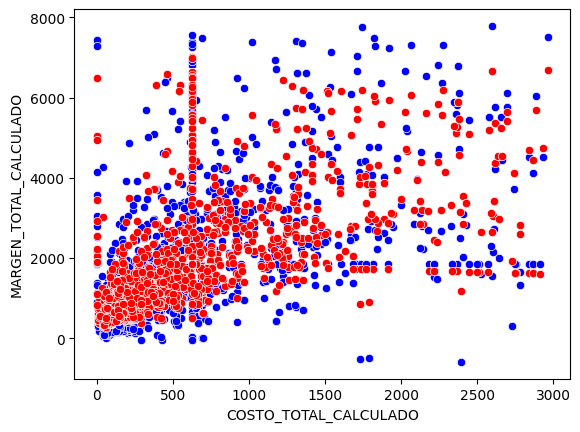

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='COSTO_TOTAL_CALCULADO', y='MARGEN_TOTAL_CALCULADO', color="blue", data=df_limpio)
sns.scatterplot(x='COSTO_TOTAL_CALCULADO', y='Predicciones', color="red", data=df_limpio)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.7561384030613831
Coeficiente de correlación:  0.8695621904506791


In [ ]:
r2a=1 - ((1 - coef_Deter) * (1426 - 1) / (1426 - 2 - 1))
r2a

0.7557956601282297

# **ARCHIVO: GASTOS Y COSTOS 2022**

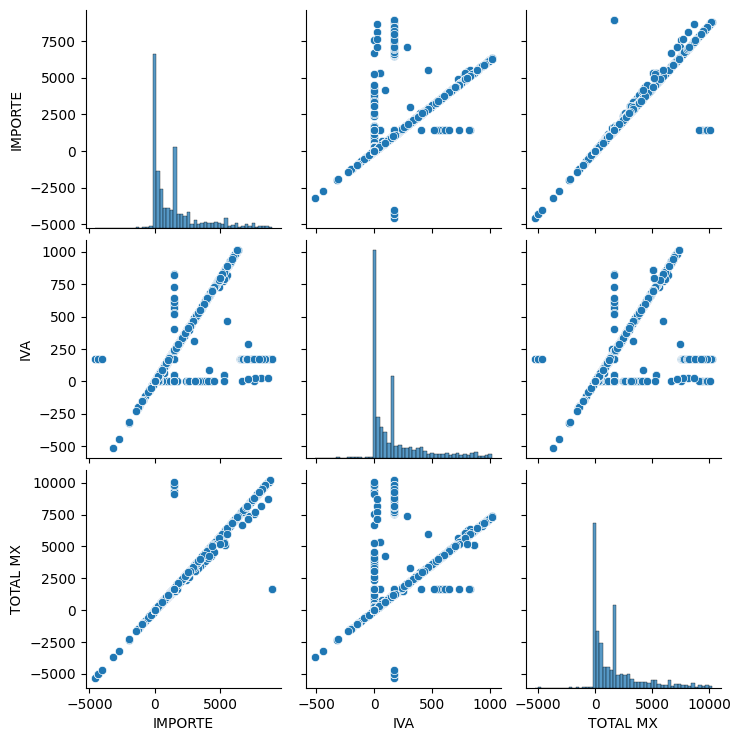

In [ ]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(df_limpio2)

In [ ]:
df_limpio2.head(3)

,FECHA,FOLIO,PROVEEDOR,DESCRIPCION,TIPO_GASTO,IMPORTE,IVA,TOTAL MX
0,2022-01-01,280109,BEPENSA LEASING S.A. DE C.V.,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,ARRENDAMIENTO FINANCIERO,5551.98,888.32,6440.3
1,2022-01-01,007817297284,"BANCO NACIONAL DE MEXICO, S.A.",Servicios de Facturación,COMISION BANCARIA,0.00,0.00,0.0
2,2022-01-01,5595,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,Pago,COMPRAS,0.00,0.00,0.0


<Axes: xlabel='IMPORTE', ylabel='TOTAL MX'>

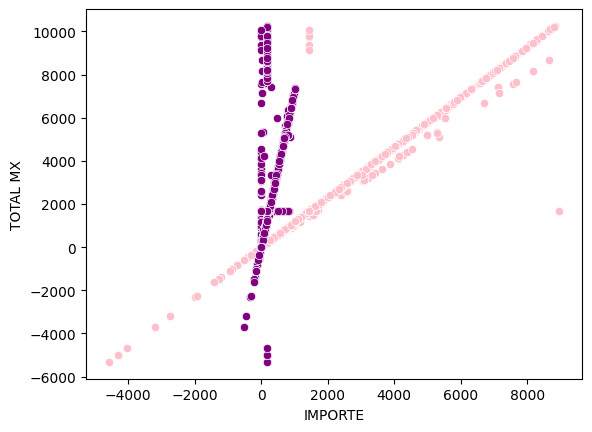

In [ ]:
from turtle import color

sns.scatterplot(x='IMPORTE', y='TOTAL MX',color="pink",data=df_limpio2)
sns.scatterplot(x='IVA', y='TOTAL MX', color="purple", data=df_limpio2)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep22= df_limpio2[['IMPORTE', 'IVA']]
Var_Dep22= df_limpio2['TOTAL MX']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep22, y=Var_Dep22)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['IMPORTE', 'IVA'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([1.10654933, 0.20730962]),
 'rank_': 2,
 'singular_': array([100240.51259662,   8499.21431084]),
 'intercept_': 30.29588655199268}

**Modelo matemático: y= 1.10654933x1 + 0.20730962x2 + 30.29588655199268**

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep22,Var_Dep22)

0.9521147114519922

In [ ]:
#Predecimos los valores de total 
y_pred22= model.predict(X=df_limpio2[['IMPORTE', 'IVA']])
y_pred22

array([6357.99293996,   30.29588655,   30.29588655, ...,   30.29588655,
         30.29588655,   30.29588655])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df_limpio2.insert(0, 'Predicciones', y_pred22)
df_limpio2

,Predicciones,FECHA,FOLIO,PROVEEDOR,DESCRIPCION,TIPO_GASTO,IMPORTE,IVA,TOTAL MX
0,6357.992940,2022-01-01,280109,BEPENSA LEASING S.A. DE C.V.,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,ARRENDAMIENTO FINANCIERO,5551.98,888.32,6440.3
1,30.295887,2022-01-01,007817297284,"BANCO NACIONAL DE MEXICO, S.A.",Servicios de Facturación,COMISION BANCARIA,0.00,0.00,0.0
2,30.295887,2022-01-01,5595,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,Pago,COMPRAS,0.00,0.00,0.0
3,30.295887,2022-01-01,5614,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,Pago,COMPRAS,0.00,0.00,0.0
4,30.295887,2022-01-01,42862,"AESA ARTICULOS ELECTRICOS, S.A. DE C.V.",Pago,COMPRAS,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...
2571,30.295887,2022-12-01,863376,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISIONES E INTERESES,COMISION BANCARIA,0.00,0.00,0.0
2572,1731.539615,2022-12-01,1092957089,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,SERVICIOS BANCARIOS,COMISION BANCARIA,1440.70,516.32,1660.0
2573,30.295887,2022-12-01,4,Aesa Articulos Electricos S.A de C.V,Pago,COMPRAS,0.00,0.00,0.0
2574,30.295887,2022-12-01,16,AESA ARTICULOS ELECTRICOS,Pago,COMPRAS,0.00,0.00,0.0


<Axes: xlabel='TOTAL MX', ylabel='IMPORTE'>

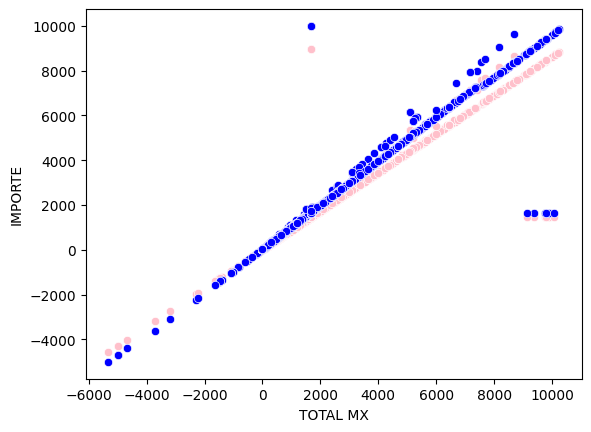

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='TOTAL MX', y='IMPORTE', color="pink", data=df_limpio2)
sns.scatterplot(x='TOTAL MX', y='Predicciones', color="blue", data=df_limpio2)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter22=model.score(X=Vars_Indep22, y=Var_Dep22)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl22=np.sqrt(coef_Deter22)
print("Coeficiente de determinacion: ",coef_Deter22)
print("Coeficiente de correlación: ", coef_Correl22)

Coeficiente de determinacion:  0.9521147114519922
Coeficiente de correlación:  0.975763655529346


In [ ]:
#R2a = 1 - [(1 - R2) * (n - 1) / (n - k - 1)]
r2_22=1 - ((1 - coef_Deter22) * (2576 - 1) / (2456 - 2 - 1))
r2_22
#Donde:

#R2a es el coeficiente de determinación ajustado.
#R2 es el coeficiente de determinación.
#n es el número de observaciones.
#k es el número de variables independientes.

0.949733135747607

### **Archivo: GASTOS Y COSTOS 2023**

<Axes: xlabel='Importe', ylabel='TOTAL MX'>

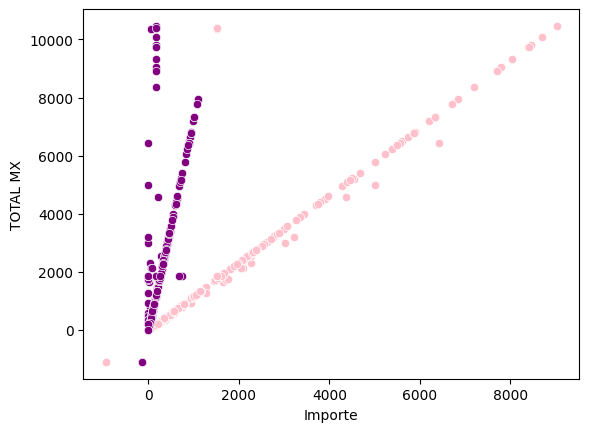

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='Importe', y='TOTAL MX',color="pink",data=df_limpio3)
sns.scatterplot(x='IVA', y='TOTAL MX', color="purple", data=df_limpio3)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep23= df_limpio3[['Importe', 'IVA']]
Var_Dep23= df_limpio3['TOTAL MX']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep23, y=Var_Dep23)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Importe', 'IVA'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([ 1.1561793, -0.0384267]),
 'rank_': 2,
 'singular_': array([39551.75473175,  3425.55670849]),
 'intercept_': 92.63433740894152}

## **Modelo matemático: y= 1.1561793x1 + -0.0384267x2 + 92.63433740894152**

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep23,Var_Dep23)

0.8740219950412595

In [ ]:
#Predecimos los valores de total 
y_pred23= model.predict(X=df_limpio3[['Importe', 'IVA']])
y_pred23

array([   92.63433741,    92.63433741,  6476.8936378 ,  6477.58350271,
        9860.60811675,   656.14954302,    92.63433741,  5317.34016455,
        2078.08324666,    92.63433741,    92.63433741,    92.63433741,
          92.63433741,    92.63433741,  2710.92563608,    92.63433741,
          92.63433741,  3109.90747062,   584.84761905,  5873.53085584,
        1851.76114797,    92.63433741,    92.63433741,  2649.15332123,
        2346.69515985,    92.63433741,  2659.15866806,   216.63072938,
        1762.47939567,   959.1987996 ,   496.1409144 ,  1844.9673076 ,
         788.09248034,    92.63433741,    92.63433741,    92.63433741,
         560.17937656,  7967.9778571 ,   477.89473308,    92.63433741,
        4577.75536166,  1844.9673076 ,  2051.49406318,  2711.07184462,
          92.63433741,    92.63433741,  5148.80319368,   737.0540724 ,
          92.63433741,    92.63433741,    92.63433741,  9000.43383839,
         253.74235374,   526.19603642,   752.81271981,  3626.63383541,
      

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df_limpio3.insert(0, 'Predicciones', y_pred23)
df_limpio3

,Predicciones,Fecha,Folio,Proveedor,Descripción,TIPO GASTO,Importe,IVA,TOTAL MX
0,92.634337,2023-01-01,31,AESA ARTICULOS ELECTRICOS,Pago,COMPRAS,0.00,0.00,0.00
1,92.634337,2023-01-01,38,AESA ARTICULOS ELECTRICOS,Pago,COMPRAS,0.00,0.00,0.00
2,6476.893638,2023-01-01,341932,BEPENSA LEASING S.A. DE C.V.,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,ARRENDAMIENTO FINANCIERO,5551.38,888.22,6439.60
3,6477.583503,2023-01-01,341933,BEPENSA LEASING S.A. DE C.V.,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,ARRENDAMIENTO FINANCIERO,5551.98,888.32,6440.30
4,9860.608117,2023-01-01,342205,BEPENSA LEASING S.A. DE C.V.,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,ARRENDAMIENTO FINANCIERO,8454.37,176.80,9807.07
...,...,...,...,...,...,...,...,...,...
392,92.634337,2023-02-01,882974,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISIONES E INTERESES,COMISION BANCARIA,0.00,0.00,0.00
393,346.993784,2023-02-01,053560,BEBIDAS PURIFICADAS,Epura 20 Lts Policarbonato,ALIMENTOS,220.00,0.00,220.00
394,1825.538769,2023-02-01,1092957089,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,SERVICIOS BANCARIOS,COMISION BANCARIA,1521.50,682.40,1845.00
395,1851.761148,2023-02-01,1453820,EFECTIVALE S. de R.L. de C.V.,CONSUMOS DE COMBUSTIBLE DE MONEDEROS ELECTRONICOS,GASOLINA,1521.50,0.00,1845.00


<Axes: xlabel='TOTAL MX', ylabel='Importe'>

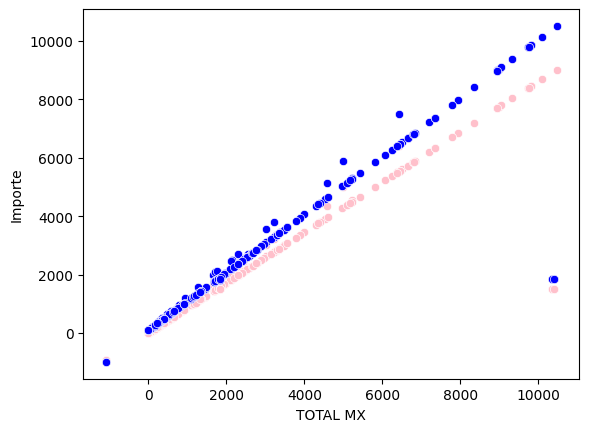

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='TOTAL MX', y='Importe', color="pink", data=df_limpio3)
sns.scatterplot(x='TOTAL MX', y='Predicciones', color="blue", data=df_limpio3)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter23=model.score(X=Vars_Indep23, y=Var_Dep23)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl23=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter23)
print("Coeficiente de correlación: ", coef_Correl23)

Coeficiente de determinacion:  0.8740219950412595
Coeficiente de correlación:  0.8695621904506791


In [ ]:
#R2a = 1 - [(1 - R2) * (n - 1) / (n - k - 1)]
r2_22=1 - ((1 - coef_Deter23) * (397 - 1) / (370 - 2 - 1))
r2_22
#Donde:

#R2a es el coeficiente de determinación ajustado.
#R2 es el coeficiente de determinación.
#n es el número de observaciones.
#k es el número de variables independientes.

0.8640673297992882

# **Modelo de Regresión Lineal Simple** 

SUBTOTAL_PARTIDA vs MARGEN_TOTAL_CALCULADO

<Axes: xlabel='SUBTOTAL_PARTIDA', ylabel='MARGEN_TOTAL_CALCULADO'>

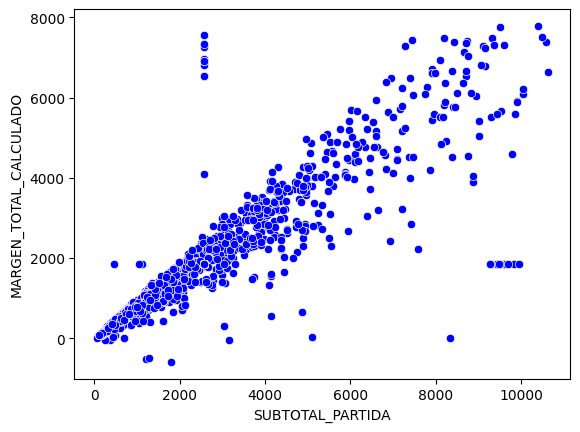

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color
sns.scatterplot(x='SUBTOTAL_PARTIDA', y='MARGEN_TOTAL_CALCULADO', color="blue", data=df_limpio)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_IndepL= df_limpio[['SUBTOTAL_PARTIDA']]
Var_DepL= df_limpio['MARGEN_TOTAL_CALCULADO']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_IndepL, y=Var_DepL)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['SUBTOTAL_PARTIDA'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.62428836]),
 'rank_': 1,
 'singular_': array([84264.79053408]),
 'intercept_': 237.71817673870873}

**Modelo matemático: y= 0.62428836x + 237.71817673870873**

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_IndepL,Var_DepL)

0.7552106559998213

In [ ]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_predL= model.predict(X=df_limpio[['SUBTOTAL_PARTIDA']])
y_predL

array([ 508.95898219, 1026.8498747 , 2648.27656764, ..., 4324.96526596,
       3927.16248185, 1846.32198682])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df_limpio.insert(0, 'Predicciones lineal', y_predL)
df_limpio

,Predicciones lineal,Predicciones,CVE_DOC,FECHA_DOC,NOMBRE,NOMBRE.1,CVE_ART,DESCR,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,508.958982,528.034130,F37034,05/01/2022 00:00,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,TUE00244,"TUB COBRE 5/16""ØX165MM CIRCULA1.5KW127V",1.0,434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,1026.849875,1033.099920,F37036,05/01/2022 00:00,LETICIA RAMIREZ HERNANDEZ,JUAN ANTONIO RESENDIZ UGALDE,TUA00028,"TUA U"" 5/16 ØX250MM 1200W 120V TAP1""NPT",1.0,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,2648.276568,2608.444669,F37041,05/01/2022 00:00,DIEGO ARMANDO LEON DURAN,ANA BARBARA CRUZ PALACIOS,TP0007,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 7 MT,7.0,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56
3,325.118547,340.132688,F37042,05/01/2022 00:00,DIEGO ARMANDO LEON DURAN,OMAR RODRIGUEZ GOMEZ,TP0001,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 1 MT,1.0,140.00,38.96,38.96,140.00,38.96,101.04,101.04
4,452.991531,454.869455,F37043,05/01/2022 00:00,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,BP00242,BAN P INOX 115MMX235MM 1000W 127V T/TOR,2.0,172.41,101.71,101.71,344.83,203.42,70.71,141.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,2904.678039,2937.427535,F39834,23/12/2022 00:00,LETICIA RAMIREZ HERNANDEZ,LUIS ENRIQUE PATIÑO PEREZ,CS12F1040A00,"CAS INOX 1/2""ØX3"" 400W 127V EXT.30CM",6.0,712.00,102.31,102.31,4272.00,613.88,609.69,3658.12
1422,2929.399858,2961.419386,F39834,23/12/2022 00:00,LETICIA RAMIREZ HERNANDEZ,LUIS ENRIQUE PATIÑO PEREZ,CS12H1050A00,"CAS INOX 1/2""ØX4"" 500W 127V EXT30CM",6.0,718.60,104.69,104.69,4311.60,628.12,613.91,3683.48
1423,4324.965266,4278.908226,F39835,23/12/2022 00:00,LETICIA RAMIREZ HERNANDEZ,SEVEN DAYS ALL SPORT,TUE00394,"TUB INOX 5/16""ØX300MM 5300W 220V ""M"" ESP",3.0,2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41
1424,3927.162482,3859.467777,F39837,23/12/2022 00:00,LETICIA RAMIREZ HERNANDEZ,REVUELTA MONTECARLO,TUA00470,"TUB INOX 1/2""ØX500MM 10KW 220V 2 1/2""NPT",1.0,942.70,108.00,219.90,5909.84,1884.35,684.80,4025.49


<Axes: xlabel='MARGEN_TOTAL_CALCULADO', ylabel='SUBTOTAL_PARTIDA'>

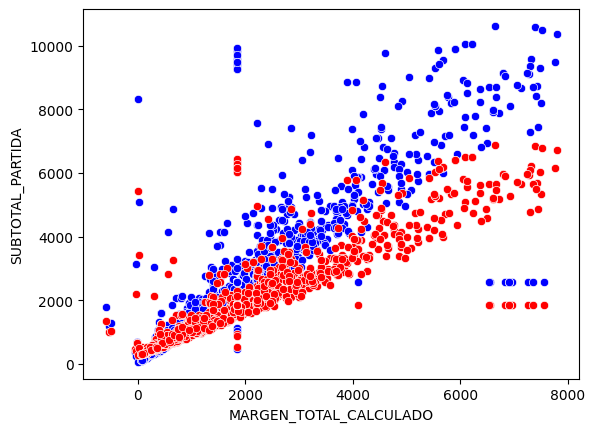

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='MARGEN_TOTAL_CALCULADO', y='SUBTOTAL_PARTIDA', color="blue", data=df_limpio)
sns.scatterplot(x='MARGEN_TOTAL_CALCULADO', y='Predicciones lineal', color="red", data=df_limpio)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_DeterL=model.score(X=Vars_IndepL, y=Var_DepL)
print("Coeficiente de Determinación")
coef_DeterL

Coeficiente de Determinación


0.7552106559998213

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_CorrelL=np.sqrt(coef_DeterL)
print("Coeficiente de Correlación")
coef_CorrelL

Coeficiente de Correlación


0.8690285703012424

In [ ]:
%pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pingouin as pg

In [ ]:
pg.linear_regression(Vars_Indep,Var_Dep)#[:,0])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,254.139559,32.823002,7.742728,1.835635e-14,0.756138,0.755796,189.752894,318.526225
1,SUBTOTAL_PARTIDA,0.642924,0.012353,52.047836,0.000000e+00,0.756138,0.755796,0.618692,0.667155
2,COSTO_TOTAL_CALCULADO,-0.103084,0.044304,-2.326728,2.011955e-02,0.756138,0.755796,-0.189994,-0.016175


# **MODELO DE REGRESIÓN LOGÍSTICA**

In [ ]:
#Cargar archivo csv desde seaborn
df_factu=pd.read_csv("Datos_limpiosFACTU23.csv")
df_factu.head(5)

,Unnamed: 0,CVE_DOC,STATUS,FECHAELAB,FECHA_DOC,FECHA_ENT,FECHA_VEN,FECHA_CANCELA,CVE_CLPV,CVE_VEND,CAN_TOT,DES_TOT,DES_FIN
0,0,F29414,C,2019-09-03 08:58:42.000,2019-09-03,2019-09-03 00:00:00,2019-09-18,2019-09-04 00:00:00,2465.0,2.0,3980.00,0.0,0
1,1,F29415,C,2019-09-03 09:55:14.000,2019-09-03,2019-09-03 00:00:00,2019-10-03,2019-09-03 00:00:00,3926.0,2.0,1550.00,0.0,0
2,2,F29416,C,2019-09-03 13:25:33.000,2019-09-03,2019-09-03 00:00:00,2019-10-03,2019-09-03 00:00:00,3926.0,2.0,1550.00,0.0,0
3,3,F29417,C,2019-09-03 13:33:23.000,2019-09-03,2019-09-03 00:00:00,2019-10-03,2019-09-17 00:00:00,3926.0,2.0,1550.00,0.0,0
4,4,F29418,C,2019-09-03 14:23:45.000,2019-09-03,2019-09-03 00:00:00,2019-09-03,2019-09-10 00:00:00,6813.0,2.0,2435.44,0.0,0


In [ ]:
df_factu=df_factu.drop("Unnamed: 0", axis=1)
df_factu

,CVE_DOC,STATUS,FECHAELAB,FECHA_DOC,FECHA_ENT,FECHA_VEN,FECHA_CANCELA,CVE_CLPV,CVE_VEND,CAN_TOT,DES_TOT,DES_FIN
0,F29414,C,2019-09-03 08:58:42.000,2019-09-03,2019-09-03 00:00:00,2019-09-18,2019-09-04 00:00:00,2465.0,2.0,3980.00,0.0,0
1,F29415,C,2019-09-03 09:55:14.000,2019-09-03,2019-09-03 00:00:00,2019-10-03,2019-09-03 00:00:00,3926.0,2.0,1550.00,0.0,0
2,F29416,C,2019-09-03 13:25:33.000,2019-09-03,2019-09-03 00:00:00,2019-10-03,2019-09-03 00:00:00,3926.0,2.0,1550.00,0.0,0
3,F29417,C,2019-09-03 13:33:23.000,2019-09-03,2019-09-03 00:00:00,2019-10-03,2019-09-17 00:00:00,3926.0,2.0,1550.00,0.0,0
4,F29418,C,2019-09-03 14:23:45.000,2019-09-03,2019-09-03 00:00:00,2019-09-03,2019-09-10 00:00:00,6813.0,2.0,2435.44,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10890,F40306,E,2023-03-06 16:09:39.013,2023-03-06,2023-03-01 00:00:00,2023-03-06,0,8842.0,2.0,3272.00,0.0,0
10891,F40307,E,2023-03-06 16:38:42.933,2023-03-06,2023-03-06 00:00:00,2023-03-06,0,6218.0,2.0,504.15,0.0,0
10892,F40308,E,2023-03-06 17:02:33.390,2023-03-06,2023-03-06 00:00:00,2023-03-06,0,5926.0,2.0,275.68,0.0,0
10893,F40309,E,2023-03-07 12:43:49.567,2023-03-07,2023-03-07 00:00:00,2023-03-07,0,361.0,2.0,129.30,0.0,0


In [ ]:
#Verificar los valores sin repetirse de una columna
unico = np.unique(df_factu['STATUS'])
unico

array(['C', 'E'], dtype=object)

In [ ]:
#Convierto una variable a dicotómica 
df_factu['STATUS']= df_factu['STATUS'].replace(['C'], "CANCELADAS")
df_factu

,CVE_DOC,STATUS,FECHAELAB,FECHA_DOC,FECHA_ENT,FECHA_VEN,FECHA_CANCELA,CVE_CLPV,CVE_VEND,CAN_TOT,DES_TOT,DES_FIN
0,F29414,CANCELADAS,2019-09-03 08:58:42.000,2019-09-03,2019-09-03 00:00:00,2019-09-18,2019-09-04 00:00:00,2465.0,2.0,3980.00,0.0,0
1,F29415,CANCELADAS,2019-09-03 09:55:14.000,2019-09-03,2019-09-03 00:00:00,2019-10-03,2019-09-03 00:00:00,3926.0,2.0,1550.00,0.0,0
2,F29416,CANCELADAS,2019-09-03 13:25:33.000,2019-09-03,2019-09-03 00:00:00,2019-10-03,2019-09-03 00:00:00,3926.0,2.0,1550.00,0.0,0
3,F29417,CANCELADAS,2019-09-03 13:33:23.000,2019-09-03,2019-09-03 00:00:00,2019-10-03,2019-09-17 00:00:00,3926.0,2.0,1550.00,0.0,0
4,F29418,CANCELADAS,2019-09-03 14:23:45.000,2019-09-03,2019-09-03 00:00:00,2019-09-03,2019-09-10 00:00:00,6813.0,2.0,2435.44,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10890,F40306,E,2023-03-06 16:09:39.013,2023-03-06,2023-03-01 00:00:00,2023-03-06,0,8842.0,2.0,3272.00,0.0,0
10891,F40307,E,2023-03-06 16:38:42.933,2023-03-06,2023-03-06 00:00:00,2023-03-06,0,6218.0,2.0,504.15,0.0,0
10892,F40308,E,2023-03-06 17:02:33.390,2023-03-06,2023-03-06 00:00:00,2023-03-06,0,5926.0,2.0,275.68,0.0,0
10893,F40309,E,2023-03-07 12:43:49.567,2023-03-07,2023-03-07 00:00:00,2023-03-07,0,361.0,2.0,129.30,0.0,0


In [ ]:
#Convierto una variable a dicotómica 
df_factu['STATUS']= df_factu['STATUS'].replace(['E'], "EMITIDAS")
df_factu

,CVE_DOC,STATUS,FECHAELAB,FECHA_DOC,FECHA_ENT,FECHA_VEN,FECHA_CANCELA,CVE_CLPV,CVE_VEND,CAN_TOT,DES_TOT,DES_FIN
0,F29414,CANCELADAS,2019-09-03 08:58:42.000,2019-09-03,2019-09-03 00:00:00,2019-09-18,2019-09-04 00:00:00,2465.0,2.0,3980.00,0.0,0
1,F29415,CANCELADAS,2019-09-03 09:55:14.000,2019-09-03,2019-09-03 00:00:00,2019-10-03,2019-09-03 00:00:00,3926.0,2.0,1550.00,0.0,0
2,F29416,CANCELADAS,2019-09-03 13:25:33.000,2019-09-03,2019-09-03 00:00:00,2019-10-03,2019-09-03 00:00:00,3926.0,2.0,1550.00,0.0,0
3,F29417,CANCELADAS,2019-09-03 13:33:23.000,2019-09-03,2019-09-03 00:00:00,2019-10-03,2019-09-17 00:00:00,3926.0,2.0,1550.00,0.0,0
4,F29418,CANCELADAS,2019-09-03 14:23:45.000,2019-09-03,2019-09-03 00:00:00,2019-09-03,2019-09-10 00:00:00,6813.0,2.0,2435.44,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10890,F40306,EMITIDAS,2023-03-06 16:09:39.013,2023-03-06,2023-03-01 00:00:00,2023-03-06,0,8842.0,2.0,3272.00,0.0,0
10891,F40307,EMITIDAS,2023-03-06 16:38:42.933,2023-03-06,2023-03-06 00:00:00,2023-03-06,0,6218.0,2.0,504.15,0.0,0
10892,F40308,EMITIDAS,2023-03-06 17:02:33.390,2023-03-06,2023-03-06 00:00:00,2023-03-06,0,5926.0,2.0,275.68,0.0,0
10893,F40309,EMITIDAS,2023-03-07 12:43:49.567,2023-03-07,2023-03-07 00:00:00,2023-03-07,0,361.0,2.0,129.30,0.0,0


In [ ]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indepfact= df_factu[['CAN_TOT']]
Var_Depfact= df_factu['STATUS']

In [ ]:
#Redefinimos las variables 
X= Vars_Indepfact
y= Var_Depfact

In [ ]:
#Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =None)

In [ ]:
#Se escalan todos los datos
escalar = StandardScaler()

In [ ]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [ ]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [ ]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test) 
y_pred

array(['EMITIDAS', 'EMITIDAS', 'EMITIDAS', ..., 'EMITIDAS', 'EMITIDAS',
       'EMITIDAS'], dtype=object)

In [ ]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[   0   64]
 [   0 2115]]


In [ ]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="weighted", pos_label="COMPRAS")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.9421201291227267


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'COMPRAS') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.9706287287746673


In [ ]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="weighted", pos_label="COMPRAS")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.9706287287746673


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'COMPRAS') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef1 = f1_score(y_test, y_pred, average="weighted", pos_label="COMPRAS")
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.9561619754813326


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'COMPRAS') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
df_limpio.head(5)

,Predicciones lineal,Predicciones,CVE_DOC,FECHA_DOC,NOMBRE,NOMBRE.1,CVE_ART,DESCR,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,508.958982,528.034130,F37034,05/01/2022 00:00,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,TUE00244,"TUB COBRE 5/16""ØX165MM CIRCULA1.5KW127V",1.0,434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,1026.849875,1033.099920,F37036,05/01/2022 00:00,LETICIA RAMIREZ HERNANDEZ,JUAN ANTONIO RESENDIZ UGALDE,TUA00028,"TUA U"" 5/16 ØX250MM 1200W 120V TAP1""NPT",1.0,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,2648.276568,2608.444669,F37041,05/01/2022 00:00,DIEGO ARMANDO LEON DURAN,ANA BARBARA CRUZ PALACIOS,TP0007,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 7 MT,7.0,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56
3,325.118547,340.132688,F37042,05/01/2022 00:00,DIEGO ARMANDO LEON DURAN,OMAR RODRIGUEZ GOMEZ,TP0001,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 1 MT,1.0,140.00,38.96,38.96,140.00,38.96,101.04,101.04
4,452.991531,454.869455,F37043,05/01/2022 00:00,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,BP00242,BAN P INOX 115MMX235MM 1000W 127V T/TOR,2.0,172.41,101.71,101.71,344.83,203.42,70.71,141.41


(array([1, 2, 3, 4, 5]),
 [Text(1, 0, 'AARON NUÑO CORDOVA'),
  Text(2, 0, 'ALFREDO CANELA'),
  Text(3, 0, 'ATENCION A CLIENTES'),
  Text(4, 0, 'DIEGO ARMANDO LEON DURAN'),
  Text(5, 0, 'LETICIA RAMIREZ HERNANDEZ')])

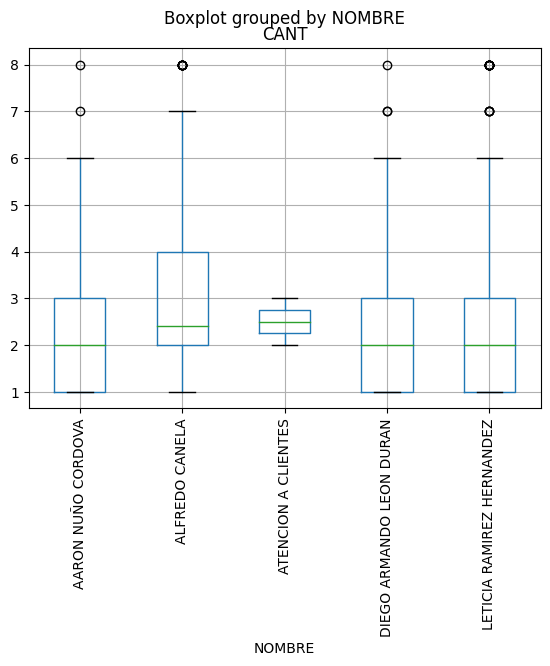

In [ ]:
df_limpio.boxplot("CANT", by= "NOMBRE")
plt.xticks(rotation=90)

In [ ]:
grupos=pd.unique(df_limpio['NOMBRE'].values)
grupos

array(['LETICIA RAMIREZ HERNANDEZ', 'DIEGO ARMANDO LEON DURAN',
       'ALFREDO CANELA', 'AARON NUÑO CORDOVA', 'ATENCION A CLIENTES'],
      dtype=object)

## **SCIPY ONEWAY (ANOVA)**

In [ ]:
#Defino grupos donde me entrega la columna Fare separada por grupos de las 
#categorías de la columna sex: "male" y "female" 
CANT_1= df_limpio.CANT[df_limpio.NOMBRE=='LETICIA RAMIREZ HERNANDEZ']
CANT_2= df_limpio.CANT[df_limpio.NOMBRE=='DIEGO ARMANDO LEON DURAN']
CANT_3= df_limpio.CANT[df_limpio.NOMBRE=='ALFREDO CANELA']
CANT_4= df_limpio.CANT[df_limpio.NOMBRE=='AARON NUÑO CORDOVA']
CANT_5= df_limpio.CANT[df_limpio.NOMBRE=='ATENCION A CLIENTES']

In [ ]:
CANT_1.head(10)

0     1.0
1     1.0
4     2.0
5     2.0
7     3.0
26    5.0
27    6.0
37    1.0
45    1.0
50    5.0
Name: CANT, dtype: float64

In [ ]:
print(CANT_1.sum())
print(CANT_2.sum())
print(CANT_3.sum())
print(CANT_4.sum())
print(CANT_5.sum())

1994.0
289.79999999999995
1011.3999999999999
180.39999999999998
5.0


In [ ]:
#p-value < 0.05, se rechaza la hipótesis de que todas las medias son iguales
#p-value < 0.05, implica que la variable categórica influye en la variable cuantitativa
anova= stats.f_oneway(CANT_1,CANT_2,CANT_3,CANT_4,CANT_5)
anova

F_onewayResult(statistic=14.82514451830729, pvalue=7.140882074122687e-12)

## **STATESMODELS (ANOVA)**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
#p-value < 0.05, se rechaza la hipótesis de que todas las medias son iguales
# Se puede generar un analisis MANOVA (Múltiples variables categóricas)
mod= ols('CANT ~ NOMBRE + PRECIO_UNITARIO + NOMBRE:PRECIO_UNITARIO', data=df_limpio).fit()
anova_table=sm.stats.anova_lm(mod, typ=2)
print (anova_table)

                             sum_sq      df          F        PR(>F)
NOMBRE                   161.370947     4.0  15.422743  2.358856e-12
PRECIO_UNITARIO            6.396301     1.0   2.445261  1.181037e-01
NOMBRE:PRECIO_UNITARIO     3.593243     4.0   0.343418  8.487055e-01
Residual                3703.965877  1416.0        NaN           NaN


## **ANOVA**

In [ ]:
df_limpio.head(5)

,Predicciones lineal,Predicciones,CVE_DOC,FECHA_DOC,NOMBRE,NOMBRE.1,CVE_ART,DESCR,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,508.958982,528.034130,F37034,05/01/2022 00:00,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,TUE00244,"TUB COBRE 5/16""ØX165MM CIRCULA1.5KW127V",1.0,434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,1026.849875,1033.099920,F37036,05/01/2022 00:00,LETICIA RAMIREZ HERNANDEZ,JUAN ANTONIO RESENDIZ UGALDE,TUA00028,"TUA U"" 5/16 ØX250MM 1200W 120V TAP1""NPT",1.0,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,2648.276568,2608.444669,F37041,05/01/2022 00:00,DIEGO ARMANDO LEON DURAN,ANA BARBARA CRUZ PALACIOS,TP0007,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 7 MT,7.0,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56
3,325.118547,340.132688,F37042,05/01/2022 00:00,DIEGO ARMANDO LEON DURAN,OMAR RODRIGUEZ GOMEZ,TP0001,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 1 MT,1.0,140.00,38.96,38.96,140.00,38.96,101.04,101.04
4,452.991531,454.869455,F37043,05/01/2022 00:00,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,BP00242,BAN P INOX 115MMX235MM 1000W 127V T/TOR,2.0,172.41,101.71,101.71,344.83,203.42,70.71,141.41


(array([1, 2, 3, 4, 5]),
 [Text(1, 0, 'AARON NUÑO CORDOVA'),
  Text(2, 0, 'ALFREDO CANELA'),
  Text(3, 0, 'ATENCION A CLIENTES'),
  Text(4, 0, 'DIEGO ARMANDO LEON DURAN'),
  Text(5, 0, 'LETICIA RAMIREZ HERNANDEZ')])

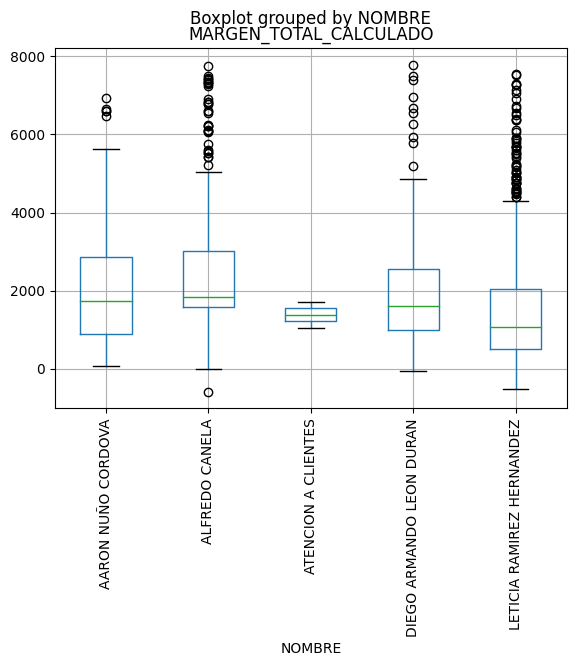

In [ ]:
df_limpio.boxplot("MARGEN_TOTAL_CALCULADO", by= "NOMBRE")
plt.xticks(rotation=90)

In [ ]:
grupos=pd.unique(df_limpio['NOMBRE'].values)
grupos

array(['LETICIA RAMIREZ HERNANDEZ', 'DIEGO ARMANDO LEON DURAN',
       'ALFREDO CANELA', 'AARON NUÑO CORDOVA', 'ATENCION A CLIENTES'],
      dtype=object)

## **SCIPY ONEWAY (ANOVA)**

In [ ]:
#Defino grupos donde me entrega la columna Fare separada por grupos de las 
#categorías de la columna sex: "male" y "female" 
MAR_1= df_limpio.MARGEN_TOTAL_CALCULADO[df_limpio.NOMBRE=='LETICIA RAMIREZ HERNANDEZ']
MAR_2= df_limpio.MARGEN_TOTAL_CALCULADO[df_limpio.NOMBRE=='DIEGO ARMANDO LEON DURAN']
MAR_3= df_limpio.MARGEN_TOTAL_CALCULADO[df_limpio.NOMBRE=='ALFREDO CANELA']
MAR_4= df_limpio.MARGEN_TOTAL_CALCULADO[df_limpio.NOMBRE=='AARON NUÑO CORDOVA']
MAR_5= df_limpio.MARGEN_TOTAL_CALCULADO[df_limpio.NOMBRE=='ATENCION A CLIENTES']

In [ ]:
print(MAR_1.sum())
print(MAR_2.sum())
print(MAR_3.sum())
print(MAR_4.sum())
print(MAR_5.sum())

1402361.3599999999
247446.25
825925.1399999999
154340.29
2773.96


In [ ]:
#p-value < 0.05, se rechaza la hipótesis de que todas las medias son iguales
#p-value < 0.05, implica que la variable categórica influye en la variable cuantitativa
anova= stats.f_oneway(CANT_1,CANT_2,CANT_3,CANT_4,CANT_5)
anova

F_onewayResult(statistic=14.82514451830729, pvalue=7.140882074122687e-12)

## **STATESMODELS (ANOVA)**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
#p-value < 0.05, se rechaza la hipótesis de que todas las medias son iguales
# Se puede generar un analisis MANOVA (Múltiples variables categóricas)
mod= ols('MARGEN_TOTAL_CALCULADO ~ NOMBRE + MARGEN_TOTAL_CALCULADO + NOMBRE:MARGEN_TOTAL_CALCULADO', data=df_limpio).fit()
anova_table=sm.stats.anova_lm(mod, typ=2)
print (anova_table)

                                     sum_sq      df             F  \
NOMBRE                         3.143540e-21     4.0  4.641425e+01   
MARGEN_TOTAL_CALCULADO         3.451744e+09     1.0  2.038595e+32   
NOMBRE:MARGEN_TOTAL_CALCULADO  7.443756e-22     4.0  1.099068e+01   
Residual                       2.397568e-20  1416.0           NaN   

                                     PR(>F)  
NOMBRE                         1.088927e-36  
MARGEN_TOTAL_CALCULADO         0.000000e+00  
NOMBRE:MARGEN_TOTAL_CALCULADO  8.861309e-09  
Residual                                NaN  


# **MODELO UTILIZANDO: Detalles_precios y Gastos y Costos**

In [ ]:
# Cargamos archivos 
productos = pd.read_csv("Detalle precios y productos fabricados 2022.csv")
gastos = pd.read_csv("Gastos_costos_2022.csv")

### Detalle de precios

In [ ]:
# Convertimos los tipos de datos en las columnas de interés
productos[['PRECIO_UNITARIO', 'COSTO_UNITARIO']] = productos[['PRECIO_UNITARIO', 'COSTO_UNITARIO']].replace({'\$': '', ',': ''}, regex=True).astype(float)
productos[['COSTO_UNITARIO_CALCULADO', 'SUBTOTAL_PARTIDA']] = productos[['COSTO_UNITARIO_CALCULADO', 'SUBTOTAL_PARTIDA']].replace({'\$': '', ',': ''}, regex=True).astype(float)
productos[['COSTO_TOTAL_CALCULADO', 'MARGEN_UNITARIO_CALCULADO']] = productos[['COSTO_TOTAL_CALCULADO', 'MARGEN_UNITARIO_CALCULADO']].replace({'\$': '', ',': ''}, regex=True).astype(float)
productos['MARGEN_TOTAL_CALCULADO'] = productos['MARGEN_TOTAL_CALCULADO'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [ ]:
productos["FECHA_DOC"] = pd.to_datetime(productos["FECHA_DOC"]).dt.strftime('%b-%y')

In [ ]:
# Agrupo por fecha buscando el MARGEN_TOTAL_CALCULADO por mes 
productos_g = productos.groupby("FECHA_DOC").sum()

<ipython-input-761-82e375db6a73>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  productos_g = productos.groupby("FECHA_DOC").sum()


### Gastos y costos

In [ ]:
# Filtramos por COMPRAS
compras = gastos[gastos["TIPO_GASTO"] == "COMPRAS"]
compras["FECHA"] = pd.to_datetime(compras["FECHA"]).dt.strftime('%b-%y')
# Filtramos por CAPACITACION
capa = gastos[gastos["TIPO_GASTO"] == "CAPACITACION"]
capa["FECHA"] = pd.to_datetime(capa["FECHA"]).dt.strftime('%b-%y')
# Filtramos por PUBLICICDAD
publi = gastos[gastos["TIPO_GASTO"] == "PUBLICIDAD"]
publi["FECHA"] = pd.to_datetime(publi["FECHA"]).dt.strftime('%b-%y')

<ipython-input-762-99bbd240c2a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compras["FECHA"] = pd.to_datetime(compras["FECHA"]).dt.strftime('%b-%y')
<ipython-input-762-99bbd240c2a5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capa["FECHA"] = pd.to_datetime(capa["FECHA"]).dt.strftime('%b-%y')
<ipython-input-762-99bbd240c2a5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [ ]:
# Agrupamos por dataframe 
compras_g = compras.groupby("FECHA").sum()
capa_g = capa.groupby("FECHA").sum()
publi_g = publi.groupby("FECHA").sum()

<ipython-input-763-e0c82e71a2ec>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  compras_g = compras.groupby("FECHA").sum()
<ipython-input-763-e0c82e71a2ec>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capa_g = capa.groupby("FECHA").sum()
<ipython-input-763-e0c82e71a2ec>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  publi_g = publi.groupby("FECHA").sum()


### Antiguedad saldos 

In [ ]:
saldos = pd.read_csv("Saldos.csv")

In [ ]:
saldos.columns

Index(['No. CLIENTE', 'NOMBRE', 'FACTURA', 'FECHA_FACTURA',
       'FECHA_VENCIMIENTO', ' MONTO ADEUDADO'],
      dtype='object')

In [ ]:
# Convertimos la columna monto adeudado a float 
saldos[' MONTO ADEUDADO'] = saldos[' MONTO ADEUDADO'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [ ]:
saldos["FECHA_FACTURA"] = pd.to_datetime(saldos["FECHA_FACTURA"]).dt.strftime('%b-%y')

In [ ]:
saldos = saldos[saldos['FECHA_FACTURA'].str.contains('22')]

In [ ]:
saldos_g = saldos.groupby("FECHA_FACTURA").sum()
saldos_g

## Unir dataframes

In [ ]:
# Obtenemos información previo a la unión 

# Detalle precios 
precios_g = productos_g[["MARGEN_TOTAL_CALCULADO", "COSTO_TOTAL_CALCULADO", "SUBTOTAL_PARTIDA" ]]

# Gastos costos 
compras_g = compras_g["TOTAL MX"]
capa_g = capa_g["TOTAL MX"]
publi_g = publi_g["TOTAL MX"]

# Saldos 
monto = saldos_g

In [ ]:
# Unimos la información en un dataframe 
merged_df = pd.merge(precios_g , compras_g, left_index=True, right_index=True, how='outer')
merged_df["COMPRAS"] = merged_df["TOTAL MX"]
# Unimos gastos por capacitaciones 
merged_df = pd.merge(merged_df , capa_g, left_index=True, right_index=True, how='outer')
merged_df["CAPACITACION"] = merged_df["TOTAL MX_y"]
# Unimos gastos por publicidad
merged_df = pd.merge(merged_df , publi_g, left_index=True, right_index=True, how='outer')
merged_df["PUBLICIDAD"] = merged_df["TOTAL MX"]
# Unimos por saldos 
merged_df = pd.merge(merged_df , saldos_g, left_index=True, right_index=True, how='outer')
#merged_df["SALDOS"] = merged_df["TOTAL MX"]
merged_df

,MARGEN_TOTAL_CALCULADO,COSTO_TOTAL_CALCULADO,SUBTOTAL_PARTIDA,TOTAL MX_x,COMPRAS,TOTAL MX_y,CAPACITACION,TOTAL MX,PUBLICIDAD,MONTO ADEUDADO
Apr-22,470590.31,162539.30,633129.56,440449.180000,440449.180000,21155.85,21155.85,NaN,NaN,3480.00
Aug-22,517404.48,167093.69,684498.16,393127.750000,393127.750000,15417.38,15417.38,2789.80,2789.80,21506.92
Dec-22,481933.34,142347.53,624280.87,291456.970000,291456.970000,10417.37,10417.37,NaN,NaN,14453.60
Feb-22,342154.18,126627.32,468781.49,429956.800000,429956.800000,28470.00,28470.00,1044.00,1044.00,NaN
Jan-22,234487.17,73154.79,307641.96,372278.820400,372278.820400,11970.00,11970.00,NaN,NaN,1000.00
Jul-22,486178.09,186771.33,672949.39,343900.280000,343900.280000,24687.37,24687.37,NaN,NaN,10092.00
Jun-22,325830.62,102605.55,428436.18,420459.620000,420459.620000,17434.16,17434.16,473.28,473.28,87.35
Mar-22,600473.23,192731.82,793205.04,469886.108922,469886.108922,8750.00,8750.00,1044.00,1044.00,NaN
May-22,342292.66,123694.20,465986.85,346066.410000,346066.410000,6314.00,6314.00,NaN,NaN,439.94
Nov-22,438346.87,131821.05,570167.89,356846.660000,356846.660000,16045.37,16045.37,6936.80,6936.80,17579.52


In [ ]:
merged_df.isna().sum()
#Tenemos nulos en PUBLICIDAD 
# Los remplazamos por 0´s
merged_df["PUBLICIDAD"] = merged_df["PUBLICIDAD"].fillna(0)
merged_df[" MONTO ADEUDADO"] = merged_df[" MONTO ADEUDADO"].fillna(0)

### Construcción del modelo 

In [ ]:
# quito variables innecesarias 
merged_df = merged_df.drop(["TOTAL MX_x", "TOTAL MX_y", "TOTAL MX"], axis= 1)

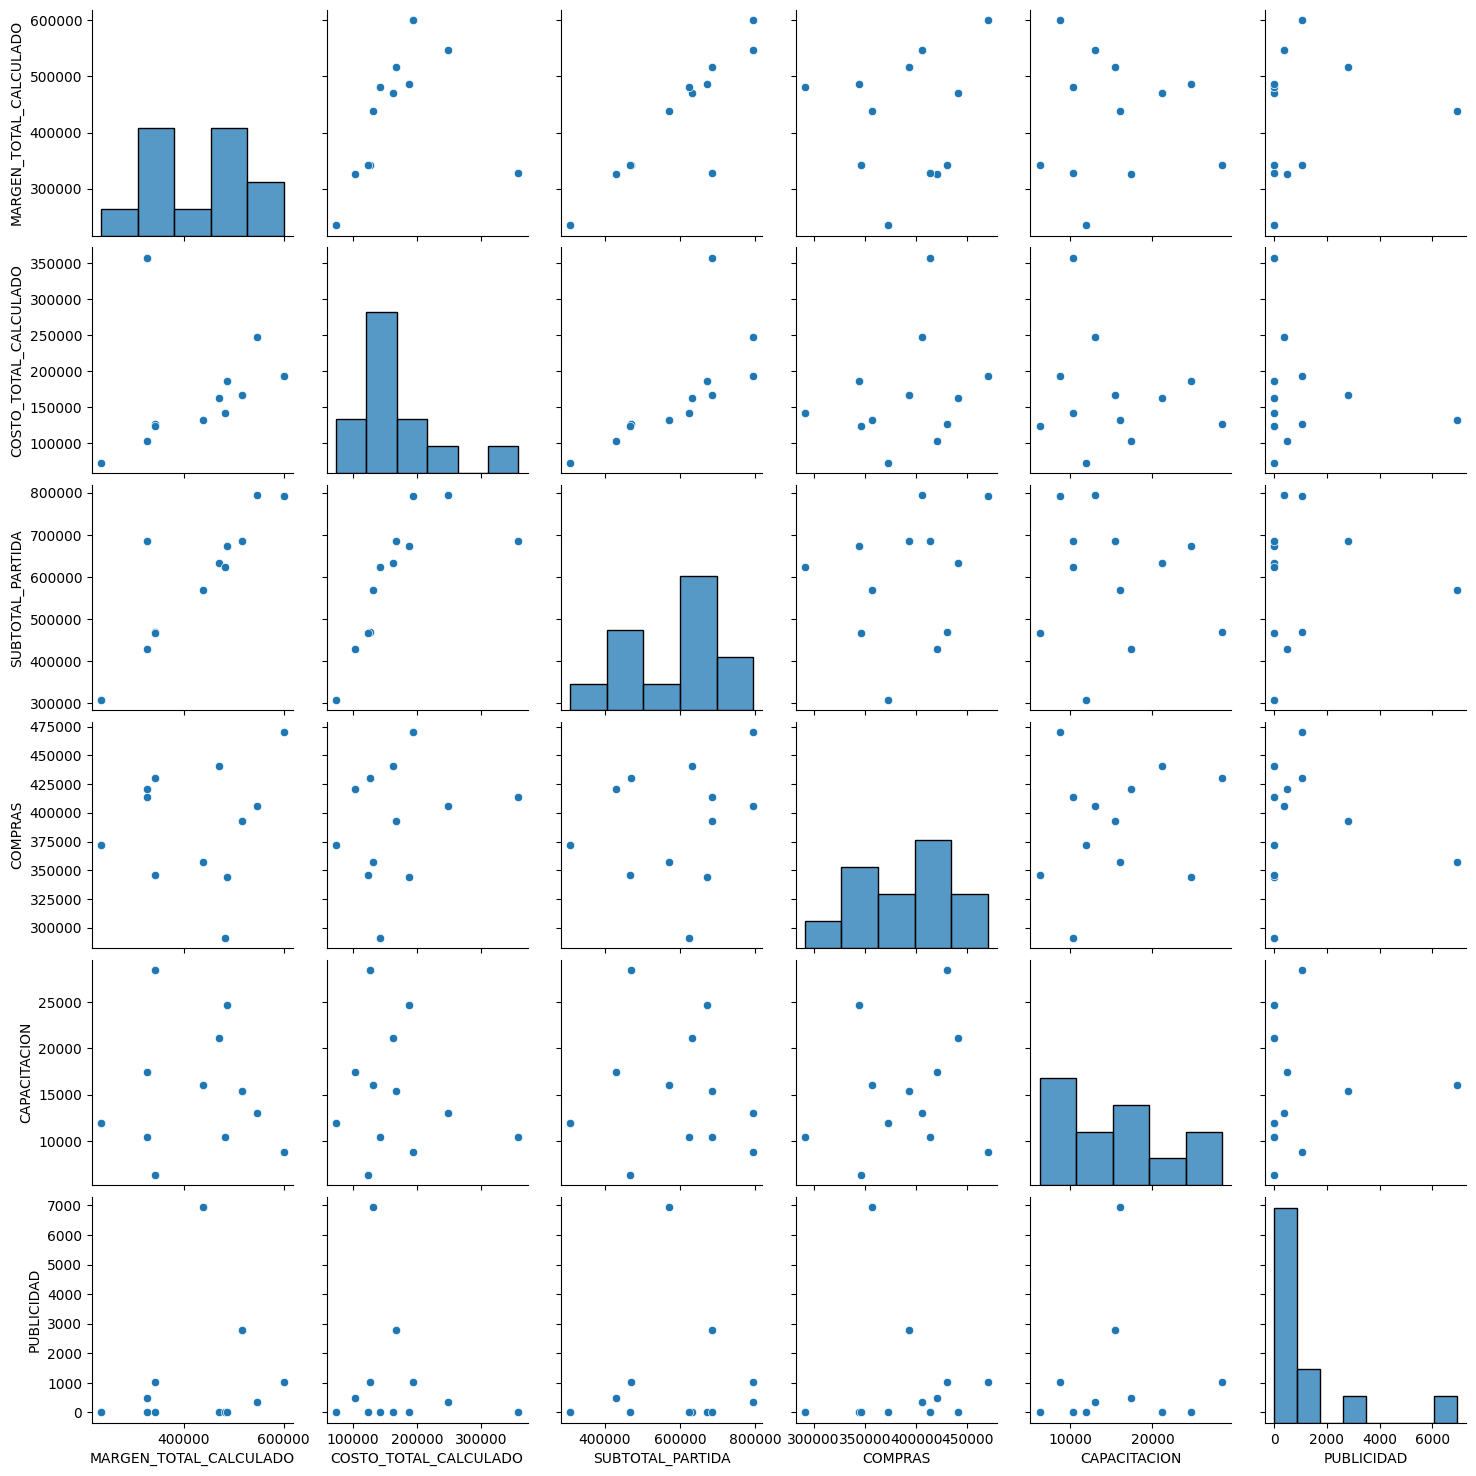

In [ ]:
#Graficamos todas las dispersiones entre todas las variables
import seaborn as sns
sns.pairplot(merged_df)

### MODELO: SUBTOTAL_PARTIDA <-> "COMPRAS", "PUBLICIDAD", "CAPACITACION" y " MONTO ADEUDADO"

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal múltiple
Vars_Indep = merged_df[["COMPRAS", "PUBLICIDAD", "CAPACITACION", " MONTO ADEUDADO"]]
Var_Dep = merged_df['SUBTOTAL_PARTIDA']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['COMPRAS', 'PUBLICIDAD', 'CAPACITACION', ' MONTO ADEUDADO'],
       dtype=object),
 'n_features_in_': 4,
 'coef_': array([  1.89838146, -27.76388083,  -4.09588542,  17.44017226]),
 'rank_': 4,
 'singular_': array([166169.6710712 ,  24575.61074224,  21477.74130186,   5572.04893211]),
 'intercept_': -186582.99423910992}

#### ecuación del modelo  SUBTOTAL_PARTIDA = 1.89COMPRAS- 27.76PUBLICIDAD -4.09CAPACITACIÓN + 17.44MONTO_ADEUDADO - 186582.99

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
coef_Deter = model.score(Vars_Indep,Var_Dep)
coef_Deter

0.5928391554485285

In [ ]:
# Calcular n y k
n = len(Vars_Indep)
k = Vars_Indep.shape[1]

# Calcular R2 ajustado
r2_ajustado = 1 - (1 - coef_Deter) * (n - 1) / (n - k - 1)
r2_ajustado

0.3601758157048305

### MODELO: MARGEN_TOTAL_CALCULADO <-> "COMPRAS", "PUBLICIDAD", "CAPACITACION"

In [ ]:
merged_df.columns

Index(['MARGEN_TOTAL_CALCULADO', 'COSTO_TOTAL_CALCULADO', 'SUBTOTAL_PARTIDA',
       'COMPRAS', 'CAPACITACION', 'PUBLICIDAD'],
      dtype='object')

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal múltiple
Vars_Indep = merged_df[["COMPRAS", "PUBLICIDAD", "CAPACITACION", " MONTO ADEUDADO"]]
Var_Dep = merged_df['MARGEN_TOTAL_CALCULADO']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['COMPRAS', 'PUBLICIDAD', 'CAPACITACION', ' MONTO ADEUDADO'],
       dtype=object),
 'n_features_in_': 4,
 'coef_': array([  1.07310187, -11.15224353,  -1.48985972,  11.21843615]),
 'rank_': 4,
 'singular_': array([166169.6710712 ,  24575.61074224,  21477.74130186,   5572.04893211]),
 'intercept_': -42863.99442450871}

#### ecuación del modelo MARGEN_TOTAL_CALCULADO =  1.07COMPRAS- 11.15PUBLICIDAD -1.489CAPACITACIÓN + 11.21MONTO_ADEUDADO - 5572.04

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
coef_Deter = model.score(Vars_Indep,Var_Dep)

In [ ]:
# Calcular n y k
n = len(Vars_Indep)
k = Vars_Indep.shape[1]

# Calcular R2 ajustado
r2_ajustado = 1 - (1 - coef_Deter) * (n - 1) / (n - k - 1)
r2_ajustado

0.13850446379419912



> # **CONCLUSIONES PERSONALES**



# **Abner Palma García | A01735312**



1.   ¿Cómo avanzó su proyecto con la aplicación de estas técnicas? (respecto a su primera entrega)

A partir de esta entrega empezamos a realizar técnicas más avanzadas respecto a al análisis de los datos ya que la entrega anterior nos especificamos mucho en la limpieza de los datos eliminando datos nulos etcétera aunque en esta entrega se añadieron la eliminación de los datos atípicos que en la entrega anterior no se había visto además de esto en la etapa de exploración podemos observar métricas de dispersión y de tendencia central que nos ayudarán a comprender más los datos de forma estructural y posteriormente se añadió también dentro la etapa de análisis y empezamos a realizar predicciones respecto a las variables de los data frames como fue el caso del data frame de detalle de precios y productos donde utilizamos regresiones lineales simples y múltiples para predecir distintas columnas o variables que tenía el data frame como el costo total calculado el cual con mejor información respecto  al negocio podríamos predecir mejores objetivos como son las ventas de sus productos en cantidad y en precio además de esto también se realizaron otros modelos para saber la importancia que existe entre distintas columnas o variables cómo es el caso de las anovas que nos ayudan ha aceptar o rechazar la hipótesis,cuando en la entrega anterior no se realizó ninguna predicción ni ningún modelo predictivo solamente se utilizaron agrupaciones y fórmulas aritméticas entre las columnas y con eso se sacó información



2.   Relaciona el objetivo de su proyecto con los avances que tienen hasta el momento

los avances que tenemos hasta ahora nos ayudan bastante ya que nos permiten ampliar nuestro conocimiento respecto a lo que podemos utilizar y hacer con los data frames y la información que tenemos de la empresa para no limitarnos en nuestros objetivos sin embargo El avance que tenemos hasta ahora nos ayuda bastante ya que nuestros objetivos principales se inclinan hacia métricas de rentabilidad y kpis que nos ayuden a observar el rendimiento de la empresa respecto a valores numéricos como son los costos de producción sus gastos e información administrativa


# **Edwin Nepomuceno Rivera | A01174706**



1.   ¿Cómo avanzó su proyecto con la aplicación de estas técnicas? (respecto a su primera entrega)


Con respecto a la primera entrega los temas vistos durante este módulo, nos ayudaron a tener más consideración en cómo manejar los datos, desde su limpieza, por ejemplo en la primera entrega aprendimos a limpiar las bases de datos con técnicas que nos ayudaban a encontrar una solución más rápida, pero con lo aprendido en este módulo, aprendimos acerca de los outliers para eliminar valores muy extremos dentro de un dataframe y que estos mismos valores no fueran a perjudicar un análisis posterior. También nos ayudó avanzar más en el análisis de los datos a partir de la estadística y sus medidas principales, esto nos ayudó ha realizar un tratamiento correcto de los datos, esto debido a que al momento de realizar análisis por ejemplo con medidas de tendencia central, se nos perdió elegir de mejor manera cuáles, serían los datos necesarios para llevar acabo nuestra solución al problema planteado.



2.   Relaciona el objetivo de su proyecto con los avances que tienen hasta el momento

La relación actual que existe entre los objetivos planteados con los avances que se tienen hasta el momento, radica principalmente con el manejo, selección y análisis de nuestros diferentes archivos y por consecuencia de las variables a utilizar para la entrega del proyecto final que se entregará al socio formador. Está etapa en la que nos encontramos es muy importante ya que hemos pasado de una introducción a los temas vistos, al ya tener una experiencia inmersiva en el manejo de bases de datos para extraer información más útil que ayude a solucionar una problemática o que sea de interés, en este caso para el socio formador, y que de esta manera podamos entregar una solución óptima. En nuestro caso en particular como equipo buscamos la generación de un tablero en dónde se pueda obtener información principalmente del área financiera (aún que no se excluyen a las demás áreas) y para esto los temas vistos en clase nos han permitido visualizar los datos y sus áreas de oportunidad para porde llevar acabo este objetivo

# **Luis Alberto Mirón Toruño | A01735489**



1.   ¿Cómo avanzó su proyecto con la aplicación de estas técnicas? (respecto a su primera entrega)

Observamos un cambio importante en la en el avance de nuestro proyecto respecto a la entrega anterior ya que la entrega anterior no se utilizó ningún modelo de predicción ya que solo se utilizaron la información que venía en los data frames que nos proporcionó la empresa y solo utilizamos agrupaciones por categorías  y con esta entrega ya utilizamos regresión lineal simple y lineal múltiple para predecir valores  numéricos utilizando información del data frame cuando en la entrega anterior había información que a veces no utilizábamos porque no tenían uso respecto a otras y en esta sí utilizamos en gran parte  la información proporcionada además de esto las técnicas que se utilizaron son más específicas para conseguir conclusiones que de otra manera no podríamos llegar a ellas ya que ya vemos relaciones entre las columnas  y podemos tanto categorizar de manera más eficiente así como de valuar los modelos usados


2.   Relaciona el objetivo de su proyecto con los avances que tienen hasta el momento


Los objetivos del equipo se basan principalmente en la medición del rendimiento de la empresa con medidas como son la rentabilidad de la empresa utilizando los archivos que nos proporcionó además de que con los modelos aprendidos de machine learning podemos realizar categorizaciones de forma no supervisada y poder ofrecerle a la empresa una mayor amplitud de objetivos y soluciones así como usos a partir de estas modelos supervisados y no supervisados, regresiones lineales que nos ayuden a predecir valores numéricos a partir de información numérica dependiente e independiente

# **Paula Gabriela Armenta Nazario | A01735618**



1.   ¿Cómo avanzó su proyecto con la aplicación de estas técnicas? (respecto a su primera entrega)

Respecto a nuestra primera evidencia del primer bloque y siguiendo la metodología CRISP-DM, se puede decir que el proyecto ha avanzado de manera ordenada y estructurada.
Ya que en esa primera entrega se identificaron los objetivos del negocio y se evalúo la situación actual de la empresa se ajustaron los objetivos que teníamos como equipo de acuerdo a la información que nos dio la empresa y se iniciaron los procesos de entendimiento, exploración, limpieza y transformación de datos en el logro de dichos objetivos. 

Considero que hacer la estadística descriptiva de las bases de datos que escogimos (Datos de Facturación, Gastos y Costos(Años 22-23) y Detalle precios y productos fabricados 2022) nos ayuda a comprender mejor la distribución de los datos y las características principales de las variables, lo que puede ser útil para la selección de las variables que se utilizarán en la Evidencia 2 ya que su objetivo es generar por lo menos 2 modelos de aprendizaje supervisado.

La selección del universo de datos apto para la modelación en lo personal considero que es super importante para ambas evidencias de este bloque ya que permite enfocar el análisis en las variables que nosotros consideramos que son relevantes para la resolución de los objetivos que buscamos.


La modelización mediante regresión (lineales y no-lineales) es una técnica que nos permitió estimar la relación entre una variable dependiente y una o varias variables independientes, lo que nos resulto útil para predecir valores futuros o entender cómo los cambios en las variables independientes afectan la variable dependiente. 

La generación de los ANOVA e intervalos de confianza es una herramienta que nos permitió determinar la significancia estadística de los resultados y proporcionar un margen de error para las estimaciones realizadas. Esto resulta útil para evaluar la validez del modelo y determinar si es apropiado para hacer predicciones precisas.

2.   Relaciona el objetivo de su proyecto con los avances que tienen hasta el momento

Nuestros objetivos como equipo son los siguientes:
Con los conocimientos adquiridos en manipulación y limpieza de datos se pretende ofrecer a la empresa un tablero de control con indicadores que le permitan tener información más actualizada de la rentabilidad de las operaciones día a día. 

La rentabilidad de la empresa es afectada por todas las áreas por lo que también se enfocarán esfuerzos en identificar los principales costos asociados a la producción las ventas y las operaciones diarias que impactan de forma significativa la rentabilidad del negocio.


Los avances desarrollados en esta evidencia se relacionan directamente con los objetivos del proyecto ya que la recolección y descripción de datos permitió identificar las variables relevantes que afectan la rentabilidad de la empresa y los costos asociados a la producción, ventas y operaciones diarias. La selección del universo de datos apto para la modelación y la modelización mediante regresión (lineales y no-lineales) permitió estimar la relación entre estas variables y la rentabilidad de la empresa, lo que es útil para hacer predicciones y tomar decisiones informadas. Además, la estadística descriptiva y la generación de una ANOVA e intervalos de confianza permitieron comprender mejor la distribución de los datos, evaluar la validez del modelo y determinar la significancia estadística de los resultados. Todo esto nos da las herramientas para que conforme avancemos en los siguientes módulos podamos ofrecer a la empresa un tablero de control con indicadores más actualizados y relevantes que le permiten tomar decisiones informadas para mejorar la rentabilidad de sus operaciones día a día.

In [ ]:
%%shell
jupyter nbconvert --to html EVIDENCIA_1_TEAM4FANTASTIC.ipynb

[NbConvertApp] Converting notebook EVIDENCIA_1_TEAM4FANTASTIC.ipynb to html
[NbConvertApp] Writing 4637790 bytes to EVIDENCIA_1_TEAM4FANTASTIC.html
